In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sys
#sys.path.insert(0, '/Users/ammar.tareen/Desktop/Research_projects/mavenn2/')
sys.path.insert(0, '/Users/tareen/Desktop/Research_Projects/2022_mavenn2_github/mavenn')

import mavenn
import logomaker
import seaborn as sns
import re

%matplotlib inline

In [2]:
#!pip3 install ipywidgets

In [3]:
data_df_full_lib_1 = pd.read_csv('../data/2022.05.15.ace2rbd/ace2rbd_raw_counts_lib1.csv')
y_cols = list(data_df_full_lib_1.columns[8:])
cols = y_cols.copy()
cols.insert(0,'x')
data_df_lib_1 = data_df_full_lib_1[cols].copy()

data_df_full_lib_2 = pd.read_csv('../data/2022.05.15.ace2rbd/ace2rbd_raw_counts_lib2.csv')
y_cols = list(data_df_full_lib_2.columns[8:])
cols = y_cols.copy()
cols.insert(0,'x')
data_df_lib_2 = data_df_full_lib_2[cols].copy()

In [4]:
data_df = pd.concat([data_df_lib_1,data_df_lib_2]).reset_index(drop=True).copy()
data_df.head()

,x,TiteSeq_01_bin1,TiteSeq_01_bin2,TiteSeq_01_bin3,TiteSeq_01_bin4,TiteSeq_02_bin1,TiteSeq_02_bin2,TiteSeq_02_bin3,TiteSeq_02_bin4,TiteSeq_03_bin1,...,TiteSeq_14_bin3,TiteSeq_14_bin4,TiteSeq_15_bin1,TiteSeq_15_bin2,TiteSeq_15_bin3,TiteSeq_15_bin4,TiteSeq_16_bin1,TiteSeq_16_bin2,TiteSeq_16_bin3,TiteSeq_16_bin4
0,NITNLCPFGEVFNATRFASVYAWNRKRISNCVADYSVLYNSASFST...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,NITNLCPFGEVFSATRFASVYAWNRKRISNCVADYSVLYNSASFST...,0,0,0,0,0,0,0,0,1,...,0,0,21,0,0,0,17,0,0,0
2,NITNLCPFGEVFNATRFASVYCWNRKRISNCVADYSVLYNSASFST...,6,35,162,4,24,85,80,30,10,...,37,0,151,4,0,0,154,19,0,0
3,NITNLCPFGEVFFATRFASVYAWNRKRISNCVADYSVLYNSASFST...,0,1,3,439,1,0,14,307,17,...,82,0,180,12,0,12,306,20,0,0
4,NITNLKPFGEVFNAWRFASVYAWNRKRISNCVADYSVLYNSASFST...,0,0,3,0,0,0,0,0,4,...,0,0,0,0,0,0,0,0,0,0


In [5]:
# y_cols_1 = list(data_df_full.columns[8:12])
# y_cols_2 = list(data_df_full.columns[68:72])

In [6]:
#y = data_df[y_cols_1+y_cols_2]

In [7]:
X = data_df['x']
y = data_df[y_cols]

In [8]:
from sklearn.model_selection import train_test_split

# split data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

In [9]:
# set positional argumnets for gpmap function
L = len(data_df['x'][0])
alphabet=['A', 'C', 'D', 'E', 'F',
          'G', 'H', 'I', 'K', 'L',
          'M', 'N', 'P', 'Q', 'R',
          'S', 'T', 'V', 'W', 'Y',]


Y = len(y_cols)
#Y = 8
print(f'L={L}, Y={Y}')

L=201, Y=64


In [10]:
# instantiate gpmap object
# gpmap = mavenn.gpmap.Multi_AdditiveGPMapLayer(L=L, 
#                                               alphabet=alphabet,
#                                               number_latent_nodes=2)

gpmap = mavenn.gpmap.AdditiveGPMapLayer(L, alphabet)



2023-04-29 22:17:43.823359: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [11]:
# read in parameters

# number of reads in each bin summed
N_y = np.sum(y,axis=0)

In [12]:
!pwd

/Users/tareen/Desktop/Research_Projects/2022_mavenn2_github/mavenn/mavenn/development_mavenn2/ace2rbd


In [13]:
path_to_packet = '/Users/tareen/Dropbox/22_mavenn2/packets/Titeseq_packet/pngs'

/var/folders/kx/rdhxdz2129n1dd59rnympr580000gp/T/ipykernel_45826/1533041094.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(N_y.index,rotation=90)


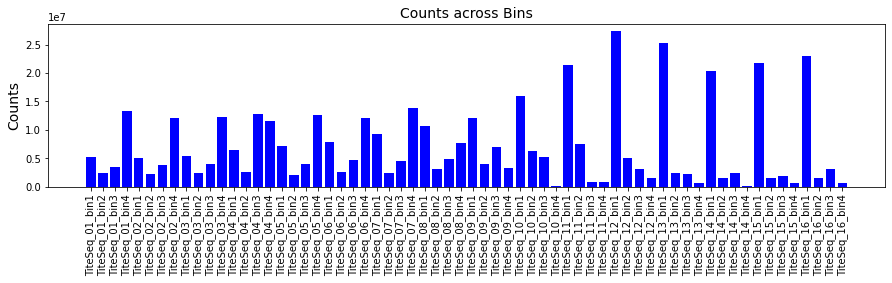

In [14]:
fig, ax = plt.subplots(figsize=(15,3))


ax.bar(N_y.index,N_y.values,color='blue')
ax.set_xticklabels(N_y.index,rotation=90)
ax.set_ylabel('Counts',fontsize=14)
ax.set_title('Counts across Bins',fontsize=14)
fig.savefig(f'{path_to_packet}/counts_across_bins.png',dpi=200,bbox_inches='tight')


#### I approximated these values from Fig 2B

In [15]:
bounds = np.log(np.array([[1,180],[180,1400],[1400,10500],[10500,250000]]))
#bounds = np.log(np.array([[1,180],[180,1400],[1400,10500],[10500,200000]]))

bounds_df = pd.DataFrame(bounds,columns=['lower_bound','upper_bound'])
f_y_lower_bounds = bounds_df['lower_bound'].values
f_y_upper_bounds = bounds_df['upper_bound'].values
np.exp(bounds_df)

,lower_bound,upper_bound
0,1.0,180.0
1,180.0,1400.0
2,1400.0,10500.0
3,10500.0,250000.0


I don't know how to obtain these values. I based them roughly on Figure 2 from Star et al

In [16]:
# mu_neg = np.log10(50)
# mu_pos = np.log10(70000)

# sigma_neg = 2.0
# sigma_pos = 2.0

# a = np.log10(10**(mu_pos) - 10**mu_neg)

# mu_neg = np.log10(50)
# mu_pos = np.log10(70000)

# mu_pos = 15.0 kd_WT = 1.0208168951388276e-05, trains well, scale kindof off.
# mu_pos = 12.5 kd_WT = 1.2361944572128138e-08
#mu_pos = 11.5 # Kd_WT = 1.6880063531355497e-10
#mu_pos = 11.0 # Kd_WT = 2.1441348615444062e-11
# mu_pos = 10 # kd_WT = 3.6290623182157056e-14, trains well but scale of
# mu_pos = 7.5 # trains well-ish but scale is really off
#mu_pos = 5.0 # doesn't work


# mu_pos = 11.5 # kd_WT = 4.09167643846012e-11
# mu_neg = 3 # kd_WT = 4.09167643846012e-11

mu_neg = 1
mu_pos = 11

sigma_neg = 2
sigma_pos = 2

# sigma 1
# 1.5 and 6 flat to rise
# 1.5 and 8 flat to rise (flattens at 10**-3)
# 1.5 and 10 flat to rise
# 1.5 and 20 doesn't work

# sigma 1.5
# 1.5 and 8 flat high
# 2 and 7 flat high
# 3.5 and 8 flat high
# 4 and 11 flat to rise (flattens at 10**-3)

# 3.5 and 5 doesn't work
# 3.5 and 8 flat to rise 
# 3.5 and 10 flat to rise 


#a = np.log10(10**(mu_pos) - 10**mu_neg)
a = 9

# a = 20, inference works, but scale of kd is off.

In [17]:
mu_pos, mu_neg,a

(11, 1, 9)

In [18]:
f_y_upper_bounds

array([ 5.19295685,  7.24422752,  9.25913054, 12.4292162 ])

In [19]:
#np.arange(10**(-13),10**(-6),10**(-12))
cs = [0,10**(-13),10**(-12.5),
     10**(-12),10**(-11.5),
     10**(-11),10**(-10.5),
     10**(-10),10**(-9.5),
     10**(-9),10**(-8.5),
     10**(-8),10**(-7.5),
     10**(-7),10**(-6.5),
     10**(-6)]

In [20]:
mp_list = [mavenn.measurement_process_layers.TiteSeqMP(N_y=N_y[4*mp_idx:4*mp_idx+4],
                                                         c=cs[mp_idx],
                                                         a=a,
                                                         Y=4,
                                                         mu_pos=mu_pos,
                                                         sigma_pos=sigma_pos,
                                                         mu_neg=mu_neg,
                                                         sigma_neg=sigma_neg,
                                                         f_y_lower_bounds=f_y_lower_bounds,
                                                         f_y_upper_bounds=f_y_upper_bounds,
                                                         info_for_layers_dict={'H_y_norm':0},
                                                         eta=1e-5,)
           for mp_idx in range(len(y_cols)//4)
          ]

In [21]:
# model = mavenn.Model2(gpmap=gpmap,
#                       mp_list=mp_list)

model = mavenn.Model2(gpmap=gpmap,
                      mp_list=mp_list)

In [22]:
model.model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 Sequence_labels_input (InputLa  [(None, 4084)]      0           []                               
 yer)                                                                                             
                                                                                                  
 Sequence_only (Lambda)         (None, 4020)         0           ['Sequence_labels_input[0][0]']  
                                                                                                  
 additive_gp_map_layer (Additiv  (None, 1)           4021        ['Sequence_only[0][0]']          
 eGPMapLayer)                                                                                     
                                                                                              

In [23]:
#y_train[y_cols_2]

In [24]:
# Set training data
model.set_data(x=x_train,
               
               y_list=[
                       y_train[y_cols[60:64]].values,
                       y_train[y_cols[56:60]].values,
                       y_train[y_cols[52:56]].values,
                       y_train[y_cols[48:52]].values,
                       y_train[y_cols[44:48]].values,
                       y_train[y_cols[40:44]].values,
                       y_train[y_cols[36:40]].values,
                       y_train[y_cols[32:36]].values,
                       y_train[y_cols[28:32]].values,
                       y_train[y_cols[24:28]].values,
                       y_train[y_cols[20:24]].values,
                       y_train[y_cols[16:20]].values,
                       y_train[y_cols[12:16]].values,
                       y_train[y_cols[8:12]].values,                   
                       y_train[y_cols[4:8]].values,                                      
                       y_train[y_cols[0:4]].values,                                                         
                      ],

               shuffle=True)

N = 165,825 observations set as training data.
Using 19.9% for validation.
Data shuffled.
Time to set data: 54.5 sec.


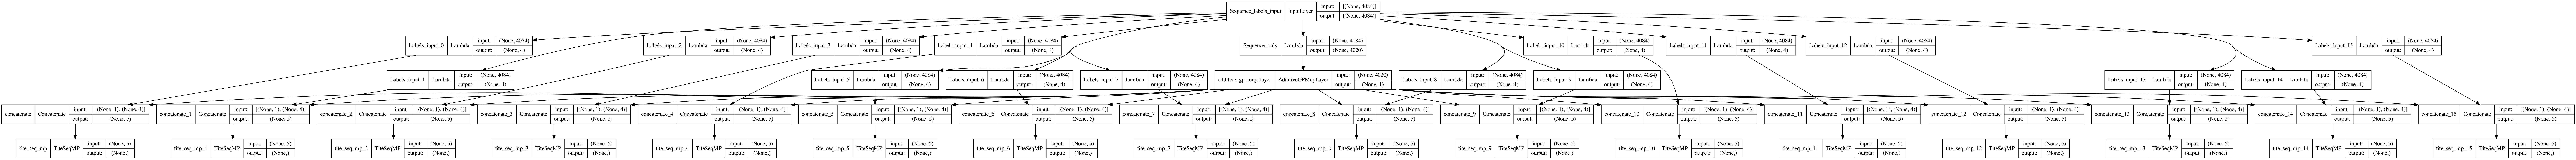

In [25]:
from tensorflow.keras.utils import plot_model
plot_model(model.model,show_shapes=True,show_dtype=False,dpi=200,
           to_file=f'{path_to_packet}/titeseq_mp_16_heads.png')

In [26]:

# Fit model to data
model.fit(learning_rate=.0005,
          epochs=100,
          batch_size=300,
          try_tqdm = False,
          early_stopping=True,
          early_stopping_patience=30,
          linear_initialization=False)

Epoch 1/100
444/444 [==============================] - 26s 32ms/step - loss: 2360088.2500 - tite_seq_mp_loss: 346683.1875 - tite_seq_mp_1_loss: 86509.1172 - tite_seq_mp_2_loss: 60655.6797 - tite_seq_mp_3_loss: 68187.7031 - tite_seq_mp_4_loss: 104849.0000 - tite_seq_mp_5_loss: 69013.1562 - tite_seq_mp_6_loss: 82621.3750 - tite_seq_mp_7_loss: 127335.6094 - tite_seq_mp_8_loss: 175553.8281 - tite_seq_mp_9_loss: 291307.7812 - tite_seq_mp_10_loss: 189143.5156 - tite_seq_mp_11_loss: 172378.4844 - tite_seq_mp_12_loss: 166361.5938 - tite_seq_mp_13_loss: 165260.5312 - tite_seq_mp_14_loss: 121520.2969 - tite_seq_mp_15_loss: 132707.9219 - I_var: -3.0030 - val_loss: 1756851.1250 - val_tite_seq_mp_loss: 346271.9375 - val_tite_seq_mp_1_loss: 77865.8203 - val_tite_seq_mp_2_loss: 42134.0000 - val_tite_seq_mp_3_loss: 43945.0859 - val_tite_seq_mp_4_loss: 71325.7656 - val_tite_seq_mp_5_loss: 45135.5898 - val_tite_seq_mp_6_loss: 47252.2188 - val_tite_seq_mp_7_loss: 73924.8438 - val_tite_seq_mp_8_loss: 1134

444/444 [==============================] - 6s 15ms/step - loss: 1685328.1250 - tite_seq_mp_loss: 346683.5938 - tite_seq_mp_1_loss: 67109.3750 - tite_seq_mp_2_loss: 41393.6406 - tite_seq_mp_3_loss: 46162.6211 - tite_seq_mp_4_loss: 65696.0312 - tite_seq_mp_5_loss: 44054.4688 - tite_seq_mp_6_loss: 43214.6133 - tite_seq_mp_7_loss: 64591.1719 - tite_seq_mp_8_loss: 101268.9688 - tite_seq_mp_9_loss: 193690.8281 - tite_seq_mp_10_loss: 105003.2266 - tite_seq_mp_11_loss: 102910.8125 - tite_seq_mp_12_loss: 109792.3281 - tite_seq_mp_13_loss: 131815.7500 - tite_seq_mp_14_loss: 102213.7734 - tite_seq_mp_15_loss: 119726.6562 - I_var: -2.5845 - val_loss: 1637570.2500 - val_tite_seq_mp_loss: 346271.9375 - val_tite_seq_mp_1_loss: 64422.0586 - val_tite_seq_mp_2_loss: 38459.3828 - val_tite_seq_mp_3_loss: 41661.0859 - val_tite_seq_mp_4_loss: 64540.0039 - val_tite_seq_mp_5_loss: 43538.6172 - val_tite_seq_mp_6_loss: 41680.2930 - val_tite_seq_mp_7_loss: 63202.5078 - val_tite_seq_mp_8_loss: 99837.1484 - val_ti

444/444 [==============================] - 5s 10ms/step - loss: 1618066.3750 - tite_seq_mp_loss: 346682.4375 - tite_seq_mp_1_loss: 69753.1094 - tite_seq_mp_2_loss: 44078.0234 - tite_seq_mp_3_loss: 50066.7070 - tite_seq_mp_4_loss: 68269.0156 - tite_seq_mp_5_loss: 42833.4062 - tite_seq_mp_6_loss: 39256.7422 - tite_seq_mp_7_loss: 56776.7852 - tite_seq_mp_8_loss: 89593.4922 - tite_seq_mp_9_loss: 180563.7656 - tite_seq_mp_10_loss: 95608.6484 - tite_seq_mp_11_loss: 92517.1406 - tite_seq_mp_12_loss: 100418.3750 - tite_seq_mp_13_loss: 125932.0234 - tite_seq_mp_14_loss: 98259.4922 - tite_seq_mp_15_loss: 117456.6250 - I_var: -2.5093 - val_loss: 1576779.6250 - val_tite_seq_mp_loss: 346271.9375 - val_tite_seq_mp_1_loss: 67294.4297 - val_tite_seq_mp_2_loss: 41140.1016 - val_tite_seq_mp_3_loss: 43542.0156 - val_tite_seq_mp_4_loss: 66869.8125 - val_tite_seq_mp_5_loss: 44006.6719 - val_tite_seq_mp_6_loss: 38286.6562 - val_tite_seq_mp_7_loss: 56427.6562 - val_tite_seq_mp_8_loss: 89517.6641 - val_tite_s

444/444 [==============================] - 5s 12ms/step - loss: 1570884.0000 - tite_seq_mp_loss: 346682.3750 - tite_seq_mp_1_loss: 72035.5469 - tite_seq_mp_2_loss: 46668.2969 - tite_seq_mp_3_loss: 53599.1250 - tite_seq_mp_4_loss: 69857.1797 - tite_seq_mp_5_loss: 42951.4570 - tite_seq_mp_6_loss: 37718.5078 - tite_seq_mp_7_loss: 52316.5938 - tite_seq_mp_8_loss: 82340.2891 - tite_seq_mp_9_loss: 171210.0312 - tite_seq_mp_10_loss: 88536.8125 - tite_seq_mp_11_loss: 85034.0703 - tite_seq_mp_12_loss: 93246.8047 - tite_seq_mp_13_loss: 120534.9609 - tite_seq_mp_14_loss: 93893.5625 - tite_seq_mp_15_loss: 114257.6328 - I_var: -2.3865 - val_loss: 1715718.8750 - val_tite_seq_mp_loss: 346271.9375 - val_tite_seq_mp_1_loss: 109148.6406 - val_tite_seq_mp_2_loss: 63447.8672 - val_tite_seq_mp_3_loss: 66282.9531 - val_tite_seq_mp_4_loss: 96780.5859 - val_tite_seq_mp_5_loss: 59255.9219 - val_tite_seq_mp_6_loss: 44956.9609 - val_tite_seq_mp_7_loss: 67448.6406 - val_tite_seq_mp_8_loss: 96573.0859 - val_tite_s

444/444 [==============================] - 5s 10ms/step - loss: 1547952.2500 - tite_seq_mp_loss: 346683.3125 - tite_seq_mp_1_loss: 76323.6250 - tite_seq_mp_2_loss: 48851.7500 - tite_seq_mp_3_loss: 57808.4141 - tite_seq_mp_4_loss: 74102.3203 - tite_seq_mp_5_loss: 43810.1602 - tite_seq_mp_6_loss: 37202.9297 - tite_seq_mp_7_loss: 49917.5156 - tite_seq_mp_8_loss: 78025.9844 - tite_seq_mp_9_loss: 165698.8281 - tite_seq_mp_10_loss: 84528.3750 - tite_seq_mp_11_loss: 80259.6250 - tite_seq_mp_12_loss: 88044.3125 - tite_seq_mp_13_loss: 116080.1641 - tite_seq_mp_14_loss: 89796.8047 - tite_seq_mp_15_loss: 110816.4688 - I_var: nan - val_loss: 1512530.2500 - val_tite_seq_mp_loss: 346271.9375 - val_tite_seq_mp_1_loss: 70006.9141 - val_tite_seq_mp_2_loss: 44079.1680 - val_tite_seq_mp_3_loss: 48992.2930 - val_tite_seq_mp_4_loss: 71150.9531 - val_tite_seq_mp_5_loss: 47244.0195 - val_tite_seq_mp_6_loss: 37521.9648 - val_tite_seq_mp_7_loss: 50359.1406 - val_tite_seq_mp_8_loss: 79083.0938 - val_tite_seq_mp

444/444 [==============================] - 5s 12ms/step - loss: 1531888.1250 - tite_seq_mp_loss: 346683.1875 - tite_seq_mp_1_loss: 78689.2031 - tite_seq_mp_2_loss: 51007.0391 - tite_seq_mp_3_loss: 61377.6289 - tite_seq_mp_4_loss: 75859.7578 - tite_seq_mp_5_loss: 45187.2031 - tite_seq_mp_6_loss: 37458.6250 - tite_seq_mp_7_loss: 48576.3711 - tite_seq_mp_8_loss: 75329.2188 - tite_seq_mp_9_loss: 161821.5781 - tite_seq_mp_10_loss: 81588.5469 - tite_seq_mp_11_loss: 77001.0859 - tite_seq_mp_12_loss: 84463.7812 - tite_seq_mp_13_loss: 112707.8906 - tite_seq_mp_14_loss: 86431.2266 - tite_seq_mp_15_loss: 107703.3672 - I_var: -2.1550 - val_loss: 1504217.2500 - val_tite_seq_mp_loss: 346271.9375 - val_tite_seq_mp_1_loss: 76193.7500 - val_tite_seq_mp_2_loss: 49195.0781 - val_tite_seq_mp_3_loss: 53158.1445 - val_tite_seq_mp_4_loss: 73908.3750 - val_tite_seq_mp_5_loss: 49376.2383 - val_tite_seq_mp_6_loss: 36755.6992 - val_tite_seq_mp_7_loss: 49035.8750 - val_tite_seq_mp_8_loss: 76538.5312 - val_tite_se

444/444 [==============================] - 5s 10ms/step - loss: 1523834.7500 - tite_seq_mp_loss: 346682.5938 - tite_seq_mp_1_loss: 82582.5938 - tite_seq_mp_2_loss: 52773.3242 - tite_seq_mp_3_loss: 64657.1680 - tite_seq_mp_4_loss: 78716.9766 - tite_seq_mp_5_loss: 46738.4961 - tite_seq_mp_6_loss: 37741.6875 - tite_seq_mp_7_loss: 47540.8594 - tite_seq_mp_8_loss: 73213.7656 - tite_seq_mp_9_loss: 158853.9688 - tite_seq_mp_10_loss: 79307.8203 - tite_seq_mp_11_loss: 74491.7812 - tite_seq_mp_12_loss: 81735.1719 - tite_seq_mp_13_loss: 110070.7500 - tite_seq_mp_14_loss: 83711.8984 - tite_seq_mp_15_loss: 105014.0234 - I_var: -2.0704 - val_loss: 1496565.6250 - val_tite_seq_mp_loss: 346271.9375 - val_tite_seq_mp_1_loss: 77279.0469 - val_tite_seq_mp_2_loss: 50237.8438 - val_tite_seq_mp_3_loss: 55817.8828 - val_tite_seq_mp_4_loss: 76951.5234 - val_tite_seq_mp_5_loss: 50415.5195 - val_tite_seq_mp_6_loss: 37190.8516 - val_tite_seq_mp_7_loss: 48179.4609 - val_tite_seq_mp_8_loss: 74776.8672 - val_tite_se

444/444 [==============================] - 4s 10ms/step - loss: 1518310.7500 - tite_seq_mp_loss: 346683.4688 - tite_seq_mp_1_loss: 84805.1484 - tite_seq_mp_2_loss: 54986.9727 - tite_seq_mp_3_loss: 65868.8750 - tite_seq_mp_4_loss: 80654.7656 - tite_seq_mp_5_loss: 48118.7148 - tite_seq_mp_6_loss: 38186.5273 - tite_seq_mp_7_loss: 47118.8438 - tite_seq_mp_8_loss: 71917.8516 - tite_seq_mp_9_loss: 156935.1562 - tite_seq_mp_10_loss: 77831.7109 - tite_seq_mp_11_loss: 72928.0625 - tite_seq_mp_12_loss: 79946.7969 - tite_seq_mp_13_loss: 108126.7891 - tite_seq_mp_14_loss: 81522.9453 - tite_seq_mp_15_loss: 102675.6328 - I_var: -2.0122 - val_loss: 1494287.1250 - val_tite_seq_mp_loss: 346271.9375 - val_tite_seq_mp_1_loss: 79309.4062 - val_tite_seq_mp_2_loss: 51992.7656 - val_tite_seq_mp_3_loss: 57412.7656 - val_tite_seq_mp_4_loss: 76094.8984 - val_tite_seq_mp_5_loss: 54438.0039 - val_tite_seq_mp_6_loss: 37905.7969 - val_tite_seq_mp_7_loss: 47686.7227 - val_tite_seq_mp_8_loss: 73430.9141 - val_tite_se

444/444 [==============================] - 5s 10ms/step - loss: 1516210.5000 - tite_seq_mp_loss: 346683.1250 - tite_seq_mp_1_loss: 86205.8672 - tite_seq_mp_2_loss: 55536.4844 - tite_seq_mp_3_loss: 68109.9844 - tite_seq_mp_4_loss: 82513.7734 - tite_seq_mp_5_loss: 49379.1094 - tite_seq_mp_6_loss: 38578.3203 - tite_seq_mp_7_loss: 46760.8398 - tite_seq_mp_8_loss: 71082.2109 - tite_seq_mp_9_loss: 155525.6562 - tite_seq_mp_10_loss: 76771.0234 - tite_seq_mp_11_loss: 71943.3516 - tite_seq_mp_12_loss: 78832.8359 - tite_seq_mp_13_loss: 106909.4844 - tite_seq_mp_14_loss: 80182.4922 - tite_seq_mp_15_loss: 101193.7891 - I_var: -1.9469 - val_loss: 1494785.6250 - val_tite_seq_mp_loss: 346271.9375 - val_tite_seq_mp_1_loss: 80897.4766 - val_tite_seq_mp_2_loss: 53676.6719 - val_tite_seq_mp_3_loss: 59802.1797 - val_tite_seq_mp_4_loss: 81669.2891 - val_tite_seq_mp_5_loss: 53667.4961 - val_tite_seq_mp_6_loss: 37598.1953 - val_tite_seq_mp_7_loss: 47719.5781 - val_tite_seq_mp_8_loss: 73203.2266 - val_tite_se

444/444 [==============================] - 5s 10ms/step - loss: 1512511.6250 - tite_seq_mp_loss: 346683.3750 - tite_seq_mp_1_loss: 86778.1797 - tite_seq_mp_2_loss: 57040.1875 - tite_seq_mp_3_loss: 69164.8828 - tite_seq_mp_4_loss: 83414.5625 - tite_seq_mp_5_loss: 49651.0234 - tite_seq_mp_6_loss: 38808.0547 - tite_seq_mp_7_loss: 46424.2695 - tite_seq_mp_8_loss: 70414.9844 - tite_seq_mp_9_loss: 154567.9219 - tite_seq_mp_10_loss: 76030.5625 - tite_seq_mp_11_loss: 71014.9609 - tite_seq_mp_12_loss: 77905.2656 - tite_seq_mp_13_loss: 105874.0156 - tite_seq_mp_14_loss: 78975.8906 - tite_seq_mp_15_loss: 99760.4453 - I_var: -1.9007 - val_loss: 1492026.5000 - val_tite_seq_mp_loss: 346271.9375 - val_tite_seq_mp_1_loss: 81227.2578 - val_tite_seq_mp_2_loss: 53411.1875 - val_tite_seq_mp_3_loss: 60956.3047 - val_tite_seq_mp_4_loss: 81627.8828 - val_tite_seq_mp_5_loss: 55179.0742 - val_tite_seq_mp_6_loss: 38621.3516 - val_tite_seq_mp_7_loss: 47171.1758 - val_tite_seq_mp_8_loss: 71932.6016 - val_tite_seq

444/444 [==============================] - 6s 13ms/step - loss: 1513237.5000 - tite_seq_mp_loss: 346683.0000 - tite_seq_mp_1_loss: 87935.7422 - tite_seq_mp_2_loss: 57339.4258 - tite_seq_mp_3_loss: 71028.6016 - tite_seq_mp_4_loss: 85385.9922 - tite_seq_mp_5_loss: 50716.9414 - tite_seq_mp_6_loss: 39243.8359 - tite_seq_mp_7_loss: 46368.9219 - tite_seq_mp_8_loss: 70470.1250 - tite_seq_mp_9_loss: 153724.1250 - tite_seq_mp_10_loss: 75422.1250 - tite_seq_mp_11_loss: 70395.0625 - tite_seq_mp_12_loss: 77188.4141 - tite_seq_mp_13_loss: 105000.5234 - tite_seq_mp_14_loss: 77900.2812 - tite_seq_mp_15_loss: 98430.7422 - I_var: -1.8598 - val_loss: 1489873.1250 - val_tite_seq_mp_loss: 346271.9375 - val_tite_seq_mp_1_loss: 78814.3125 - val_tite_seq_mp_2_loss: 53643.1406 - val_tite_seq_mp_3_loss: 61512.0664 - val_tite_seq_mp_4_loss: 81367.4922 - val_tite_seq_mp_5_loss: 57308.1562 - val_tite_seq_mp_6_loss: 39937.0547 - val_tite_seq_mp_7_loss: 46998.6836 - val_tite_seq_mp_8_loss: 71169.2578 - val_tite_seq

444/444 [==============================] - 5s 12ms/step - loss: 1512564.3750 - tite_seq_mp_loss: 346682.1875 - tite_seq_mp_1_loss: 88564.6562 - tite_seq_mp_2_loss: 59097.1484 - tite_seq_mp_3_loss: 72282.9297 - tite_seq_mp_4_loss: 86272.1328 - tite_seq_mp_5_loss: 50871.6406 - tite_seq_mp_6_loss: 39578.1680 - tite_seq_mp_7_loss: 46300.4844 - tite_seq_mp_8_loss: 69561.7578 - tite_seq_mp_9_loss: 153030.6562 - tite_seq_mp_10_loss: 74899.8672 - tite_seq_mp_11_loss: 69832.9688 - tite_seq_mp_12_loss: 76550.4531 - tite_seq_mp_13_loss: 104299.6875 - tite_seq_mp_14_loss: 77158.5859 - tite_seq_mp_15_loss: 97576.9219 - I_var: -1.8312 - val_loss: 1492591.5000 - val_tite_seq_mp_loss: 346271.9375 - val_tite_seq_mp_1_loss: 81857.2891 - val_tite_seq_mp_2_loss: 54405.8672 - val_tite_seq_mp_3_loss: 64833.4570 - val_tite_seq_mp_4_loss: 83930.2969 - val_tite_seq_mp_5_loss: 56408.6875 - val_tite_seq_mp_6_loss: 39542.2422 - val_tite_seq_mp_7_loss: 46962.8320 - val_tite_seq_mp_8_loss: 71062.8594 - val_tite_seq

444/444 [==============================] - 5s 11ms/step - loss: 1513612.7500 - tite_seq_mp_loss: 346681.3125 - tite_seq_mp_1_loss: 89826.4688 - tite_seq_mp_2_loss: 59321.2344 - tite_seq_mp_3_loss: 73692.0859 - tite_seq_mp_4_loss: 87882.8281 - tite_seq_mp_5_loss: 51922.4883 - tite_seq_mp_6_loss: 39895.9727 - tite_seq_mp_7_loss: 46156.3672 - tite_seq_mp_8_loss: 69079.4297 - tite_seq_mp_9_loss: 152393.4688 - tite_seq_mp_10_loss: 74376.9141 - tite_seq_mp_11_loss: 69377.6562 - tite_seq_mp_12_loss: 76085.4922 - tite_seq_mp_13_loss: 103731.3672 - tite_seq_mp_14_loss: 76493.0000 - tite_seq_mp_15_loss: 96692.6875 - I_var: -1.8031 - val_loss: 1496629.5000 - val_tite_seq_mp_loss: 346271.9375 - val_tite_seq_mp_1_loss: 84435.0312 - val_tite_seq_mp_2_loss: 56401.4648 - val_tite_seq_mp_3_loss: 65066.3281 - val_tite_seq_mp_4_loss: 85935.7734 - val_tite_seq_mp_5_loss: 57245.4570 - val_tite_seq_mp_6_loss: 39325.0273 - val_tite_seq_mp_7_loss: 47121.2031 - val_tite_seq_mp_8_loss: 71194.5703 - val_tite_seq

444/444 [==============================] - 5s 11ms/step - loss: 1515007.7500 - tite_seq_mp_loss: 346683.3750 - tite_seq_mp_1_loss: 90527.7109 - tite_seq_mp_2_loss: 59914.8789 - tite_seq_mp_3_loss: 74650.0703 - tite_seq_mp_4_loss: 89025.6406 - tite_seq_mp_5_loss: 53048.9609 - tite_seq_mp_6_loss: 40119.7695 - tite_seq_mp_7_loss: 46099.3008 - tite_seq_mp_8_loss: 68903.7422 - tite_seq_mp_9_loss: 151997.2656 - tite_seq_mp_10_loss: 74205.5078 - tite_seq_mp_11_loss: 69062.4609 - tite_seq_mp_12_loss: 75693.5781 - tite_seq_mp_13_loss: 103234.7500 - tite_seq_mp_14_loss: 75898.4688 - tite_seq_mp_15_loss: 95937.6094 - I_var: -1.7749 - val_loss: 1495321.1250 - val_tite_seq_mp_loss: 346271.9375 - val_tite_seq_mp_1_loss: 83676.0000 - val_tite_seq_mp_2_loss: 56248.1094 - val_tite_seq_mp_3_loss: 66480.6953 - val_tite_seq_mp_4_loss: 86003.1719 - val_tite_seq_mp_5_loss: 57521.5312 - val_tite_seq_mp_6_loss: 39820.6133 - val_tite_seq_mp_7_loss: 47011.1523 - val_tite_seq_mp_8_loss: 70738.2578 - val_tite_seq

In [27]:

# # Fit model to data
# model.fit(learning_rate=.0005,
#           epochs=500,
#           batch_size=400,
#           try_tqdm = False,
#           early_stopping=False,
#           early_stopping_patience=10,
#           linear_initialization=False)a

On test data:


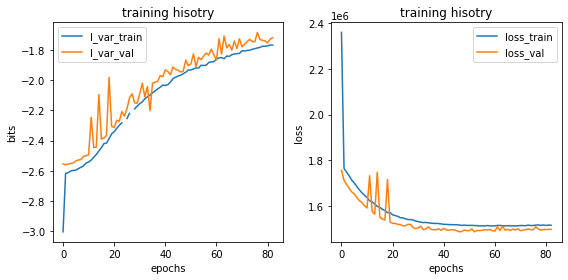

In [28]:
# Show training history
print('On test data:')
# x_test = test_df['x'].values
# y_test = test_df[y_cols].values


I_var_hist = model.history['I_var']
val_I_var_hist = model.history['val_I_var']

fig, axs = plt.subplots(1,2,figsize=[8,4])

ax = axs[0]
ax.plot(I_var_hist, label='I_var_train')
ax.plot(val_I_var_hist, label='I_var_val')
ax.legend()
ax.set_xlabel('epochs')
ax.set_ylabel('bits')
#ax.set_xscale('log')
ax.set_title('training hisotry')

ax = axs[1]
ax.plot(model.history['loss'], label='loss_train')
ax.plot(model.history['val_loss'], label='loss_val')
# ax.set_xlim(100,300)
# ax.set_ylim(0.7*1e6,0.8*1e6)
ax.legend()
ax.set_xlabel('epochs')
ax.set_ylabel('loss')
#ax.set_xscale('log')
#ax.set_yscale('log')
ax.set_title('training hisotry')
fig.tight_layout()

In [29]:
model.history['loss'][-1]/1e6

1.515548125

In [30]:
phi = gpmap.x_to_phi(x_test)
theta = np.squeeze(gpmap.weights[1].numpy())


In [31]:
theta

array([[ 0.09853438, -0.17465222, -0.24730231, ..., -0.24912529,
        -0.2562151 , -0.3031399 ],
       [-0.00388517, -0.09347656, -0.06129202, ...,  0.04659362,
        -0.14114425, -0.06401991],
       [ 0.0237273 , -0.409132  ,  0.10048022, ...,  0.03571757,
        -0.13075736, -0.08397143],
       ...,
       [-0.13561712, -0.16227987, -0.3153794 , ...,  0.04712265,
         0.11106568, -0.26198623],
       [-0.16148761,  0.06632547,  0.11420972, ..., -0.046149  ,
        -0.4186433 ,  0.14043064],
       [ 0.38813487,  0.38482133,  0.21771851, ..., -0.16102077,
         0.34971246,  0.52775496]], dtype=float32)

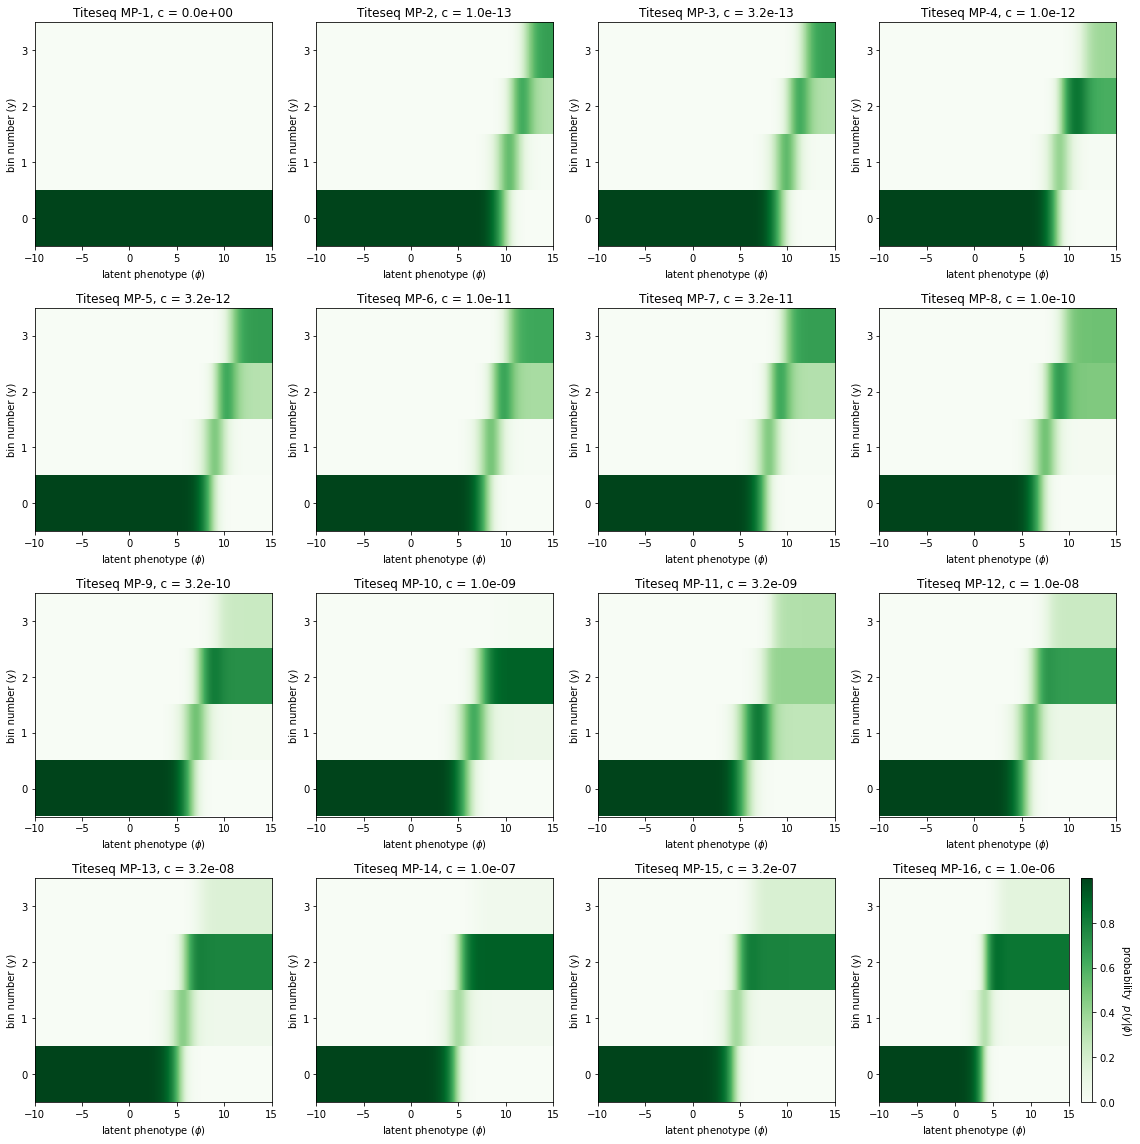

In [32]:
# Get G-P map parameters in matrix form


# Create grid in phi space
phi_lim = [-10, 15]
phi_grid = np.linspace(phi_lim[0], phi_lim[1], 1000)

# Create array of allowable y values
Y = mp_list[0].Y    # Y = number of bins
y_lim = [-.5, Y-.5]
y_all = range(Y)

# Compute matrix of p(y|phi) values



# Create figure with two panels
fig, axs = plt.subplots(4,4,figsize=[16,16])

mp_counter = 0
for i in range(4):
    for j in range(4):
        
        measurement_process = mp_list[mp_counter].p_of_y_given_phi(y_all, phi_grid)
        # Right panel: draw measurement process as heatmap
        ax = axs[i,j]

        im = ax.imshow(measurement_process,
                       cmap='Greens',
                       extent=phi_lim+y_lim,
                       vmin=0,
                       origin='lower',
                       interpolation='nearest',
                       aspect="auto")
        ax.set_yticks(y_all)
        ax.set_ylabel('bin number (y)')
        ax.set_xlabel('latent phenotype ($\phi$)')
        ax.set_title(f'Titeseq MP-{mp_counter+1}, c = {cs[mp_counter]:.1e}')
        mp_counter+=1
        
cb = plt.colorbar(im)
cb.set_label('probability  $p(y|\phi)$', rotation=-90, va="bottom")
fig.tight_layout()

#fig.savefig(f'ace2rbd_Titeseq_measurment_prcoess_mu_pos_{(mu_pos):.3f}.png',dpi=300,bbox_inches='tight')


In [33]:
bloom_single_mut_df = pd.read_csv('single_mut_effects_Bloom.txt')

bloom_bind_df = pd.DataFrame(columns=alphabet)
for site in range(1,201+1,):

    temp_df = bloom_single_mut_df[bloom_single_mut_df['site_RBD']==site].copy()
    #temp_df['bind_lib1']
    #expr_lib1
    bloom_bind_df.loc[site-1] = temp_df['bind_avg'].values[0:20]

bloom_bind_df.head()


,A,C,D,E,F,G,H,I,K,L,M,N,P,Q,R,S,T,V,W,Y
0,-0.03,-0.09,0.03,0.00,-0.10,-0.04,-0.02,-0.07,-0.01,-0.05,-0.02,0.00,-0.03,0.01,-0.02,-0.03,0.06,-0.04,-0.16,-0.06
1,0.00,-0.09,-0.02,0.08,-0.22,-0.08,0.04,0.00,-0.05,0.00,0.00,0.00,0.06,-0.02,0.00,-0.04,-0.03,0.00,-0.03,-0.03
2,-0.01,-0.14,-0.01,-0.15,-0.15,-0.07,-0.07,-0.06,-0.01,-0.01,-0.02,-0.06,0.03,0.02,0.00,-0.08,0.00,-0.05,-0.21,-0.07
3,-0.03,-0.11,0.07,0.01,-0.22,-0.03,-0.02,-0.20,-0.03,-0.20,-0.05,0.00,-0.18,0.01,0.00,-0.06,-0.04,-0.07,-0.24,-0.09
4,0.04,-0.11,0.00,0.06,-0.03,-0.08,-0.03,-0.02,-0.03,0.00,0.01,0.03,0.06,-0.02,-0.01,0.01,0.02,-0.08,-0.05,-0.02


In [34]:
bloom_single_mut_df

,site_RBD,site_SARS2,wildtype,mutant,mutation,mutation_RBD,bind_lib1,bind_lib2,bind_avg,expr_lib1,expr_lib2,expr_avg
0,1,331,N,A,N331A,N1A,-0.05,-0.02,-0.03,-0.14,-0.08,-0.11
1,1,331,N,C,N331C,N1C,-0.08,-0.10,-0.09,-1.56,-0.97,-1.26
2,1,331,N,D,N331D,N1D,0.00,0.07,0.03,-0.75,-0.12,-0.44
3,1,331,N,E,N331E,N1E,0.02,-0.02,0.00,-0.39,-0.24,-0.31
4,1,331,N,F,N331F,N1F,-0.03,-0.16,-0.10,-0.83,-0.57,-0.70
...,...,...,...,...,...,...,...,...,...,...,...,...
4216,201,531,T,T,T531T,T201T,0.00,0.00,0.00,0.00,0.00,0.00
4217,201,531,T,V,T531V,T201V,0.03,-0.02,0.01,-0.07,-0.05,-0.06
4218,201,531,T,W,T531W,T201W,0.02,-0.06,-0.02,-0.13,-0.04,-0.08
4219,201,531,T,Y,T531Y,T201Y,0.00,-0.03,-0.01,-0.03,-0.08,-0.05


In [35]:
bloom_single_mut_df = pd.read_csv('single_mut_effects_Bloom.txt')
bloom_exp_df = pd.DataFrame(columns=alphabet)
for site in range(1,201+1,):

    temp_df = bloom_single_mut_df[bloom_single_mut_df['site_RBD']==site].copy()
    temp_df['expr_lib1']
    bloom_exp_df.loc[site-1] = temp_df['expr_avg'].values[0:20]
    
bloom_exp_df.head()    

,A,C,D,E,F,G,H,I,K,L,M,N,P,Q,R,S,T,V,W,Y
0,-0.11,-1.26,-0.44,-0.31,-0.70,-0.25,-0.61,-0.85,-0.20,-0.75,-0.75,0.00,-0.21,-0.53,-0.44,-0.33,-0.34,-0.61,-1.12,-1.02
1,0.00,-0.12,0.03,0.01,-0.10,0.14,0.05,0.00,-0.06,-0.03,-0.02,0.05,-0.17,0.07,-0.04,-0.03,-0.04,0.02,-0.33,-0.07
2,-0.37,-0.93,-0.27,-0.31,-0.89,-0.41,-0.29,-1.03,-0.20,-0.55,-0.47,-0.35,-0.28,-0.35,-0.54,-0.04,0.00,-0.56,-0.63,-0.62
3,-0.12,-0.57,-0.04,-0.05,-0.97,-0.21,-0.12,-0.67,-0.02,-0.72,-0.40,0.00,-0.55,-0.08,-0.12,-0.19,-0.02,-0.47,-1.01,-0.61
4,-0.01,-0.38,-0.09,0.11,-0.16,-0.16,-0.10,-0.16,0.02,0.00,-0.15,-0.08,0.09,-0.05,-0.14,-0.08,-0.08,-0.10,-0.13,-0.12


In [36]:
theta_df = pd.DataFrame(theta,columns=alphabet)

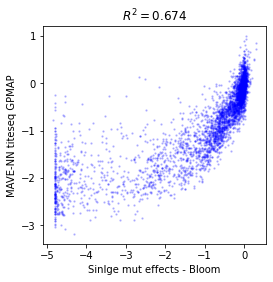

In [37]:
fig, axs = plt.subplots(1,1,figsize=[4,4])

# Left panel: draw logo using logomaker
ax = axs
Rsq = np.corrcoef(bloom_bind_df.fillna(0).values.ravel(), theta_df.fillna(0).values.ravel())[0,1]**2
ax.scatter(bloom_bind_df.fillna(0).values,theta_df.fillna(0).values,s=2,alpha=0.2,color='blue')
ax.set_xlabel('Sinlge mut effects - Bloom')
ax.set_ylabel('MAVE-NN titeseq GPMAP')
ax.set_title(f'$R^2 = {Rsq:.3f}$')
# ax.set_xticks(np.arange(0,201,5))
# ax.set_xticklabels([f'{x}' for x in range(331,531+1,5)])
plt.show()

In [38]:
theta_lc = gpmap.get_theta(model,gauge='consensus')['theta_lc']
theta_lc_consensus_df = pd.DataFrame(theta_lc,columns=alphabet)

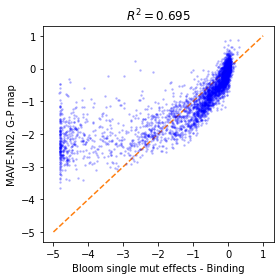

In [39]:
plt.figure(figsize=(4,4))
Rsq = np.corrcoef(bloom_bind_df.fillna(0).values.ravel(), theta_lc_consensus_df.fillna(0).values.ravel())[0,1]**2
plt.scatter(bloom_bind_df.values, theta_lc_consensus_df.values,s=2.5,alpha=0.2,color='blue')

lims = [-5,1]
plt.plot(lims,lims,'--',color='C1',zorder=-1)
plt.xlabel('Bloom single mut effects - Binding')
plt.title(f'$R^2 = {Rsq:.3f}$')
plt.ylabel('MAVE-NN2, G-P map')
plt.tight_layout()
#plt.savefig('mavenn_bloom_binding_comparison.png',dpi=200,bbox_inches='tight')

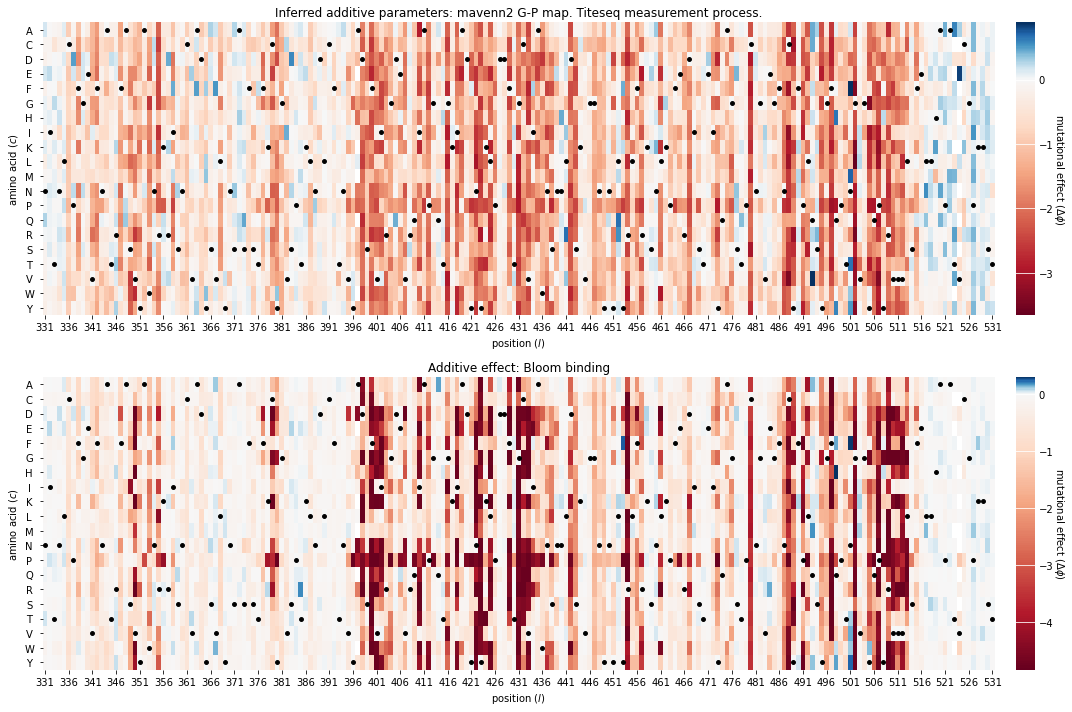

In [40]:

# Create figure
fig, axs = plt.subplots(2,1, figsize=(15,10))

# Draw heatmap
ax = axs[0]

heatmap_ax, cb = mavenn.heatmap(ax=ax,
                                values=theta_lc_consensus_df.values,
                                alphabet=alphabet,
                                seq=model.x_stats['consensus_seq'],
                                seq_kwargs={'c':'black', 's':15},
                                cmap='RdBu',
                                cbar=True,
                                cmap_size='2%',
                                #clim = [-5,0.5],
                                cmap_pad=.3,
                                ccenter=0)
# Style heatmap (can be different between two dataset)
#heatmap_ax.set_xticks()
heatmap_ax.tick_params(axis='y', which='major', pad=10)
heatmap_ax.set_xlabel('position ($l$)')
heatmap_ax.set_ylabel('amino acid ($c$)')
heatmap_ax.set_title(f'Inferred additive parameters: mavenn2 G-P map. Titeseq measurement process.')
heatmap_ax.set_xticks(np.arange(0,201,5))
heatmap_ax.set_xticklabels([f'{x}' for x in range(331,531+1,5)])

# Style colorbar
cb.outline.set_visible(False)
cb.ax.tick_params(direction='in', size=20, color='white')
cb.set_label('mutational effect ($\Delta \phi$)', labelpad=5, rotation=-90, ha='center', va='center')

# Adjust figure and show
#fig.tight_layout(w_pad=5)
#fig.savefig('ace2rbd_g-p_map_mpa_sortseq_only_heatmap.png',dpi=300,bbox_inches='tight')

bloom_exp_df
# Create figure
#fig, ax = plt.subplots(1,1, figsize=(15,5))

# Draw heatmap
ax = axs[1]

heatmap_ax, cb = mavenn.heatmap(ax=ax,
                                values=bloom_bind_df.values,
                                alphabet=alphabet,
                                seq=model.x_stats['consensus_seq'],
                                seq_kwargs={'c':'black', 's':15},
                                cmap='RdBu',
                                cbar=True,
                                #clim = [-5,0.5],
                                cmap_size='2%',
                                cmap_pad=.3,
                                ccenter=0)
# Style heatmap (can be different between two dataset)
#heatmap_ax.set_xticks()
heatmap_ax.tick_params(axis='y', which='major', pad=10)
heatmap_ax.set_xlabel('position ($l$)')
heatmap_ax.set_ylabel('amino acid ($c$)')
heatmap_ax.set_title(f'Additive effect: Bloom binding')

heatmap_ax.set_xticks(np.arange(0,201,5))
heatmap_ax.set_xticklabels([f'{x}' for x in range(331,531+1,5)])

# Style colorbar
cb.outline.set_visible(False)
cb.ax.tick_params(direction='in', size=20, color='white')
cb.set_label('mutational effect ($\Delta \phi$)', labelpad=5, rotation=-90, ha='center', va='center')

# Adjust figure and show
fig.tight_layout(w_pad=5)
fig.savefig(f'{path_to_packet}/ace2rbd_g-p_map_titeseq_heatmap_comparisons.png',dpi=300,bbox_inches='tight')

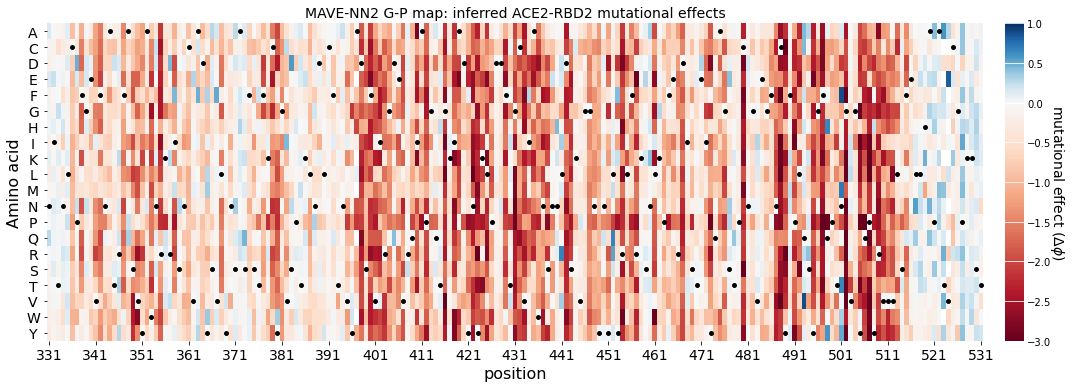

In [41]:

# Create figure
fig, axs = plt.subplots(1,1, figsize=(15,5.5))

# Draw heatmap
ax = axs

heatmap_ax, cb = mavenn.heatmap(ax=ax,
                                values=theta_lc_consensus_df.values,
                                alphabet=alphabet,
                                seq=model.x_stats['consensus_seq'],
                                seq_kwargs={'c':'black', 's':15},
                                cmap='RdBu',
                                cbar=True,
                                cmap_size='2%',
                                clim = [-3,1],
                                cmap_pad=.3,
                                ccenter=0)
# Style heatmap (can be different between two dataset)
#heatmap_ax.set_xticks()
heatmap_ax.tick_params(axis='y', which='major', pad=10)
heatmap_ax.set_xlabel('position',fontsize=16)
heatmap_ax.set_ylabel('Amino acid',fontsize=16)
heatmap_ax.set_title(f'MAVE-NN2 G-P map: inferred ACE2-RBD2 mutational effects',fontsize=14)
heatmap_ax.set_yticklabels(alphabet,fontsize=14)
heatmap_ax.set_xticks(np.arange(0,201,10))
heatmap_ax.set_xticklabels([f'{x}' for x in range(331,531+1,10)],fontsize=14)

# Style colorbar
cb.outline.set_visible(False)
cb.ax.tick_params(direction='in', size=20, color='white')
cb.set_label('mutational effect ($\Delta \phi$)', labelpad=5, rotation=-90, ha='center', va='center',fontsize=14)

# Adjust figure and show
#fig.tight_layout(w_pad=5)
#fig.savefig('ace2rbd_g-p_map_mpa_sortseq_only_heatmap.png',dpi=300,bbox_inches='tight')

bloom_exp_df
# Create figure
#fig, ax = plt.subplots(1,1, figsize=(15,5))

# # Draw heatmap
# ax = axs[1]

# heatmap_ax, cb = mavenn.heatmap(ax=ax,
#                                 values=bloom_bind_df.values,
#                                 alphabet=alphabet,
#                                 seq=model.x_stats['consensus_seq'],
#                                 seq_kwargs={'c':'black', 's':15},
#                                 cmap='RdBu',
#                                 cbar=True,
#                                 #clim = [-5,0.5],
#                                 cmap_size='2%',
#                                 cmap_pad=.3,
#                                 ccenter=0)
# # Style heatmap (can be different between two dataset)
# #heatmap_ax.set_xticks()
# heatmap_ax.tick_params(axis='y', which='major', pad=10)
# heatmap_ax.set_xlabel('position ($l$)')
# heatmap_ax.set_ylabel('amino acid ($c$)')
# heatmap_ax.set_title(f'Additive effect: Bloom binding')

# heatmap_ax.set_xticks(np.arange(0,201,5))
# heatmap_ax.set_xticklabels([f'{x}' for x in range(331,531+1,5)])

# # Style colorbar
# cb.outline.set_visible(False)
# cb.ax.tick_params(direction='in', size=20, color='white')
# cb.set_label('mutational effect ($\Delta \phi$)', labelpad=5, rotation=-90, ha='center', va='center')

# Adjust figure and show
fig.tight_layout(w_pad=5)
fig.savefig('ace2rbd_g-p_map_titeseq_heatmap_binding.png',dpi=300,bbox_inches='tight')

In [42]:
theta_lc_consensus_dm_df = pd.read_csv('discrete_monotonic_ace2rbd_binding.csv')
theta_lc_consensus_da_df = pd.read_csv('discrete_agnostic_ace2rbd_binding.csv')

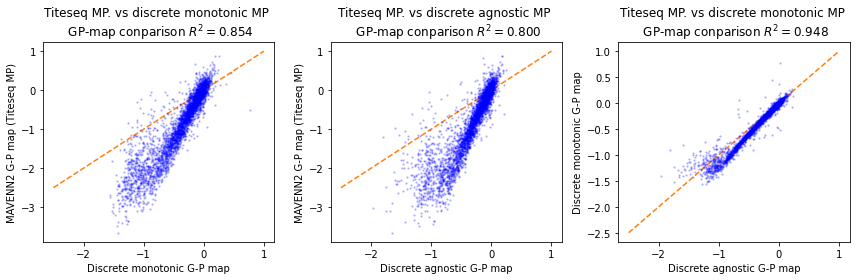

In [43]:
fig, axs = plt.subplots(1,3,figsize=(12,4))

ax = axs[0]
Rsq = np.corrcoef(theta_lc_consensus_dm_df.fillna(0).values.ravel(), theta_lc_consensus_df.fillna(0).values.ravel())[0,1]**2
ax.scatter(theta_lc_consensus_dm_df.values, theta_lc_consensus_df.values,s=2,alpha=0.2,color='blue')

lims = [-2.5,1]
ax.plot(lims,lims,'--',color='C1',zorder=-1)
ax.set_xlabel('Discrete monotonic G-P map')
ax.set_title(f'Titeseq MP. vs discrete monotonic MP \n GP-map conparison $R^2 = {Rsq:.3f}$')
ax.set_ylabel('MAVENN2 G-P map (Titeseq MP)')


ax = axs[1]
Rsq = np.corrcoef(theta_lc_consensus_da_df.fillna(0).values.ravel(), theta_lc_consensus_df.fillna(0).values.ravel())[0,1]**2
ax.scatter(theta_lc_consensus_da_df.values, theta_lc_consensus_df.values,s=2,alpha=0.2,color='blue')

lims = [-2.5,1]
ax.plot(lims,lims,'--',color='C1',zorder=-1)
ax.set_xlabel('Discrete agnostic G-P map')
ax.set_title(f'Titeseq MP. vs discrete agnostic MP \n GP-map conparison $R^2 = {Rsq:.3f}$')
ax.set_ylabel('MAVENN2 G-P map (Titeseq MP)')
fig.tight_layout()


ax = axs[2]
Rsq = np.corrcoef(theta_lc_consensus_da_df.fillna(0).values.ravel(), theta_lc_consensus_dm_df.fillna(0).values.ravel())[0,1]**2
ax.scatter(theta_lc_consensus_da_df.values, theta_lc_consensus_dm_df.values,s=2,alpha=0.2,color='blue')

lims = [-2.5,1]
ax.plot(lims,lims,'--',color='C1',zorder=-1)
ax.set_xlabel('Discrete agnostic G-P map')
ax.set_title(f'Titeseq MP. vs discrete monotonic MP \n GP-map conparison $R^2 = {Rsq:.3f}$')
ax.set_ylabel('Discrete monotonic G-P map')
fig.tight_layout()
plt.savefig(f'{path_to_packet}/Titeseq_discrete_monotonic_agnostic_binding_comparison.png',dpi=200,bbox_inches='tight')


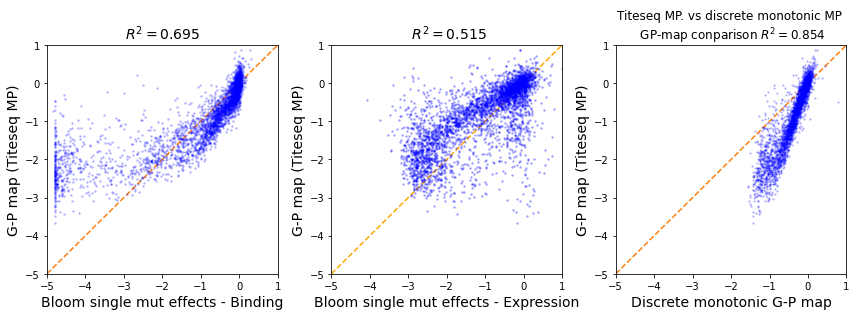

In [44]:
fig, axs = plt.subplots(1,3,figsize=(12,4.5))

ax = axs[0]

Rsq = np.corrcoef(bloom_bind_df.fillna(0).values.ravel(), theta_lc_consensus_df.fillna(0).values.ravel())[0,1]**2


lims = [-5,1]
ax.plot(lims,lims,'--',color='C1',zorder=-1)
ax.scatter(bloom_bind_df.values, theta_lc_consensus_df.values,s=2.5,alpha=0.2,color='blue')
ax.set_xlabel('Bloom single mut effects - Binding',fontsize=14)
ax.set_title(f'$R^2 = {Rsq:.3f}$',fontsize=14)
ax.set_ylabel('G-P map (Titeseq MP)',fontsize=14)
ax.set_xlim(lims)
ax.set_ylim(lims)

ax = axs[1]

Rsq = np.corrcoef(bloom_exp_df.fillna(0).values.ravel(), theta_lc_consensus_df.fillna(0).values.ravel())[0,1]**2
ax.scatter(bloom_exp_df.values, theta_lc_consensus_df.values,s=2.5,alpha=0.25,color='blue')

#lims = [-5,1]
ax.plot(lims,lims,'--',color='orange',zorder=-1)
ax.set_xlabel('Bloom single mut effects - Expression',fontsize=14)
ax.set_title(f'\n $R^2 = {Rsq:.3f}$',fontsize=14)
ax.set_ylabel('G-P map (Titeseq MP)',fontsize=14)
ax.set_xlim(lims)
ax.set_ylim(lims)

ax = axs[2]
Rsq = np.corrcoef(theta_lc_consensus_dm_df.fillna(0).values.ravel(), theta_lc_consensus_df.fillna(0).values.ravel())[0,1]**2
ax.scatter(theta_lc_consensus_dm_df.values, theta_lc_consensus_df.values,s=2,alpha=0.2,color='blue')

#lims = [-2.5,1]
ax.plot(lims,lims,'--',color='C1',zorder=-1)
ax.set_xlabel('Discrete monotonic G-P map',fontsize=14)
ax.set_title(f'Titeseq MP. vs discrete monotonic MP \n GP-map conparison $R^2 = {Rsq:.3f}$')
ax.set_ylabel('G-P map (Titeseq MP)',fontsize=14)
ax.set_xlim(lims)
ax.set_ylim(lims)


#fig.suptitle('Titeseq measurement process',fontsize=14,y=1.01)
fig.tight_layout()
fig.savefig(f'{path_to_packet}/mavenn2_bloom_binding_expression_comparison.png',dpi=200,bbox_inches='tight')


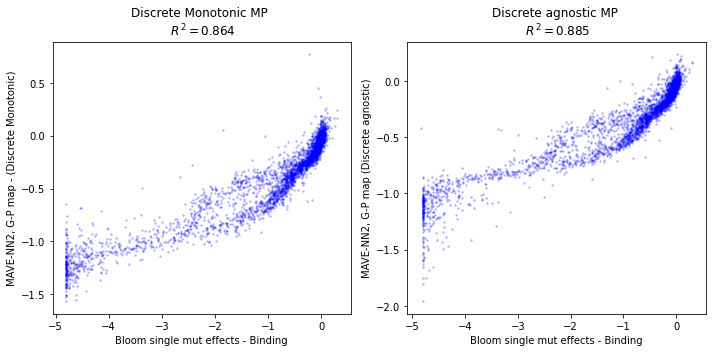

In [45]:
fig, axs = plt.subplots(1,2,figsize=(10,5))

ax = axs[0]
Rsq = np.corrcoef(bloom_bind_df.fillna(0).values.ravel(), theta_lc_consensus_dm_df.fillna(0).values.ravel())[0,1]**2
ax.scatter(bloom_bind_df.values, theta_lc_consensus_dm_df.values,s=2.5,alpha=0.2,color='blue')

lims = [-5,1]
#plt.plot(lims,lims,'--',color='gray',zorder=-1)
ax.set_xlabel('Bloom single mut effects - Binding')
ax.set_title(f'Discrete Monotonic MP \n $R^2 = {Rsq:.3f}$')
ax.set_ylabel('MAVE-NN2, G-P map - (Discrete Monotonic)')



ax = axs[1]
Rsq = np.corrcoef(bloom_bind_df.fillna(0).values.ravel(), theta_lc_consensus_da_df.fillna(0).values.ravel())[0,1]**2
ax.scatter(bloom_bind_df.values, theta_lc_consensus_da_df.values,s=2.5,alpha=0.2,color='blue')

lims = [-5,1]
#plt.plot(lims,lims,'--',color='gray',zorder=-1)
ax.set_xlabel('Bloom single mut effects - Binding')
ax.set_title(f'Discrete agnostic MP \n $R^2 = {Rsq:.3f}$')
ax.set_ylabel('MAVE-NN2, G-P map (Discrete agnostic)')


fig.tight_layout()
#plt.savefig('mavenn_bloom_binding_comparison.png',dpi=200,bbox_inches='tight')

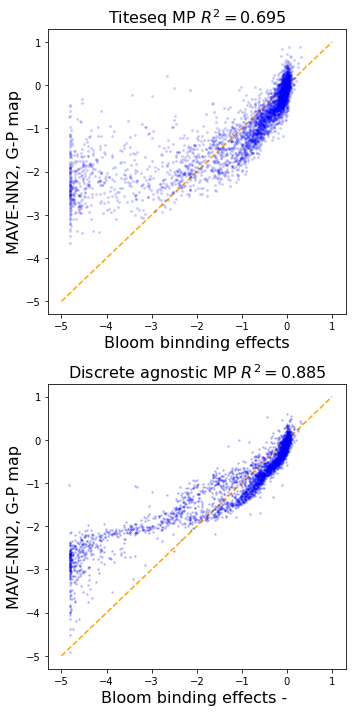

In [46]:
fig, axs = plt.subplots(2,1,figsize=(5,10))

ax = axs[0]
Rsq = np.corrcoef(bloom_bind_df.fillna(0).values.ravel(), theta_lc_consensus_df.fillna(0).values.ravel())[0,1]**2
ax.scatter(bloom_bind_df.values, theta_lc_consensus_df.values,s=3.5,alpha=0.15,color='blue')

lims = [-5,1]
ax.plot(lims,lims,'--',color='orange',zorder=-1)
ax.set_xlabel('Bloom binnding effects',fontsize=16)
ax.set_title(f'Titeseq MP $R^2 = {Rsq:.3f}$',fontsize=16)
ax.set_ylabel('MAVE-NN2, G-P map',fontsize=16)



ax = axs[1]
Rsq = np.corrcoef(bloom_bind_df.fillna(0).values.ravel(), theta_lc_consensus_da_df.fillna(0).values.ravel())[0,1]**2
ax.scatter(bloom_bind_df.values, 2.5*theta_lc_consensus_da_df.values,s=2.5,alpha=0.2,color='blue')

lims = [-5,1]
plt.plot(lims,lims,'--',color='orange',zorder=-1)
ax.set_xlabel('Bloom binding effects - ',fontsize=16)
ax.set_title(f'Discrete agnostic MP $R^2 = {Rsq:.3f}$',fontsize=16)
ax.set_ylabel('MAVE-NN2, G-P map',fontsize=16)


fig.tight_layout()
plt.savefig('mavenn_bloom_binding_comparison.png',dpi=200,bbox_inches='tight')


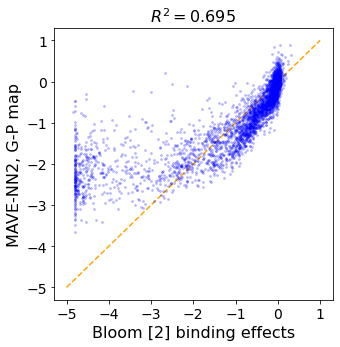

In [47]:
fig, axs = plt.subplots(1,1,figsize=(5,5))

ax = axs
Rsq = np.corrcoef(bloom_bind_df.fillna(0).values.ravel(), theta_lc_consensus_df.fillna(0).values.ravel())[0,1]**2
ax.scatter(bloom_bind_df.values, theta_lc_consensus_df.values,s=3.5,alpha=0.2,color='blue')

lims = [-5,1]
ax.plot(lims,lims,'--',color='orange',zorder=-1)
ax.set_xlabel('Bloom [2] binding effects',fontsize=16)
ax.set_title(f'$R^2 = {Rsq:.3f}$',fontsize=16)
ax.set_ylabel('MAVE-NN2, G-P map',fontsize=16)
ax.tick_params(labelsize=14)
ax.set_xticks([-5,-4,-3,-2,-1,0,1])
ax.set_yticks([-5,-4,-3,-2,-1,0,1])
fig.savefig('mavenn_bloom_binding_comparison.png',dpi=300,bbox_inches='tight',facecolor='white')

In [48]:
!pwd

/Users/tareen/Desktop/Research_Projects/2022_mavenn2_github/mavenn/mavenn/development_mavenn2/ace2rbd


Get titration curves

In [49]:
# #phi = gpmap.x_to_phi(x_test)

# #a = mp_list[0].get_weights()[0][0]

# def mu_of_phi(c, 
#               a=a,
#               phi=phi,
#               mu_neg=mu_neg):

#     K_a_of_phi = 10**(phi)
#     B = 10**(mu_neg)
#     A = 10**(a)
    
#     mu_of_phi = np.log10(A*(c*K_a_of_phi)/(1+c*K_a_of_phi)+B)
    
#     return mu_of_phi


In [50]:
# plt.figure(figsize=(5,5))

# #cs_ = np.arange(0.01,30,0.01)
# cs_bloom = np.arange(10**(-13),10**(-3),10**(-6))

# for _ in np.random.choice(np.arange(0,len(phi)),size=10):
#     plt.plot(cs_bloom,mu_of_phi(c=10**(cs_bloom),phi=phi[_]),'o-')
#     #plt.plot(cs_bloom,mu_of_phi(c=cs_bloom,phi=phi[_]),'o-')
    
    
# plt.xlabel('log concentration - grid (inferred)',fontsize=12)
# #plt.xscale('log')
# #plt.yscale('log')
# plt.ylabel('$\mu(\phi)$',fontsize=15)
# #plt.ylim(0,4)

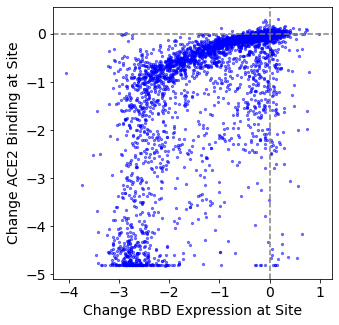

In [51]:
plt.figure(figsize=(5,5))
plt.scatter(bloom_exp_df.values.ravel(),bloom_bind_df.values.ravel(), color='blue',s=5,alpha=0.5)
plt.xlabel('Change RBD Expression at Site',fontsize=14)
plt.ylabel('Change ACE2 Binding at Site',fontsize=14)
plt.axvline(0,ls='--',color='gray')
plt.axhline(0,ls='--',color='gray')
plt.tick_params(labelsize=14)
plt.savefig('Bloom_binding_vs_expression.png',dpi=200,bbox_inches='tight')

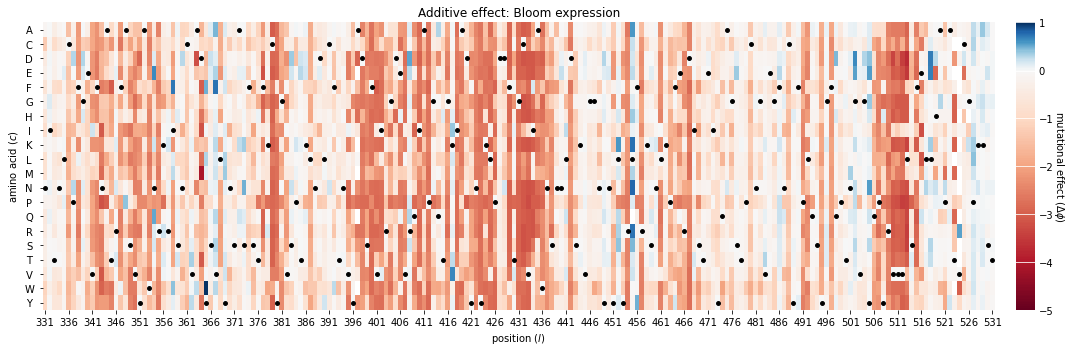

In [52]:

# Create figure
fig, ax = plt.subplots(1,1, figsize=(15,5))


heatmap_ax, cb = mavenn.heatmap(ax=ax,
                                values=bloom_exp_df.values,
                                alphabet=alphabet,
                                seq=model.x_stats['consensus_seq'],
                                seq_kwargs={'c':'black', 's':15},
                                cmap='RdBu',
                                cbar=True,
                                clim = [-5,1],
                                cmap_size='2%',
                                cmap_pad=.3,
                                ccenter=0)
# Style heatmap (can be different between two dataset)
#heatmap_ax.set_xticks()
heatmap_ax.tick_params(axis='y', which='major', pad=10)
heatmap_ax.set_xlabel('position ($l$)')
heatmap_ax.set_ylabel('amino acid ($c$)')
heatmap_ax.set_title(f'Additive effect: Bloom expression')

heatmap_ax.set_xticks(np.arange(0,201,5))
heatmap_ax.set_xticklabels([f'{x}' for x in range(331,531+1,5)])

# Style colorbar
cb.outline.set_visible(False)
cb.ax.tick_params(direction='in', size=20, color='white')
cb.set_label('mutational effect ($\Delta \phi$)', labelpad=5, rotation=-90, ha='center', va='center')

# Adjust figure and show
fig.tight_layout(w_pad=5)
fig.savefig('ace2rbd_g-p_map_heatmap_bloom_expression.png',dpi=300,bbox_inches='tight')

### Compute $K_d$ values

In [53]:
#phi = gpmap.x_to_phi(x_test)

#a = mp_list[0].get_weights()[0][0]

def mu_of_phi(c, 
              a=None,
              phi=phi,
              mu_neg=mu_neg):

    K_a_of_phi = 10**(phi)
    B = 10**(mu_neg)
    A = 10**(a)
    
    mu_of_phi = np.log10(A*(c*K_a_of_phi)/(1+c*K_a_of_phi)+B)
    
    return mu_of_phi


In [54]:
mu_pos,mu_neg

(11, 1)

In [55]:
# as_list = []
# for idx, layer in enumerate(model.model.layers[35:]):
#     as_list.append(layer.get_weights()[0][0])
    
# fig, ax = plt.subplots(figsize=(5,4))
# ax.plot(as_list,'ro-')
# ax.set_xlabel('Measurement process id')
# ax.set_ylabel('Inferred $a$ (for each MP)')
# ax.set_xticks(np.arange(0,16))
# ax.set_xticklabels(np.arange(1,16+1))
# ax.axhline(np.mean(as_list))

In [56]:
def _x_to_mat(x, alphabet):
    return (np.array(list(x))[:, np.newaxis] == alphabet[np.newaxis, :]).astype(float)

In [57]:
WT_seq = model.x_stats['consensus_seq']

single_mutants = []

for idx,WT_char in enumerate(WT_seq):
    #print(idx)
    for mutant in model.alphabet:
#         if mutant==WT_seq[idx]:
#             continue
#         else:
        temp_WT_list = list(WT_seq)
        temp_WT_list[idx] = mutant
        single_mutant = ''.join(temp_WT_list)
        single_mutants.append(single_mutant)
            

In [58]:
# len(single_mutants[0])

In [59]:
phi_single_mutants = gpmap.x_to_phi(single_mutants)

In [60]:
mavenn2_Kd = pd.DataFrame(1/(10**phi_single_mutants.reshape(201,20)),columns=model.alphabet)

In [61]:
# fig, axs = plt.subplots(1,2,figsize=(10,5))


# #lims=[10**-12,10**-1]
# #ax.plot(lims,lims,'--',color='orange')

# #Rsq = np.corrcoef(10**bloom_bind_df.values.ravel(),10**(phi_single_mutants))[0,1]**2
# ax = axs[0]
# #ax.set_title(f'$R^2$ = {Rsq:.3f}')
# ax.scatter(10**bloom_bind_df.values.ravel(),
#            10**(phi_single_mutants),
#             color='blue',s=5,alpha=0.25)
# ax.set_xscale('log')
# ax.set_yscale('log')

# ax.set_xlabel('$K_d$ (Starr et al)',fontsize=14)
# ax.set_ylabel('$K_d$, MAVE-NN, ${{\\rm exp}_{10}(\phi)}^{-1}$',fontsize=14)


# ax = axs[1]
# #ax.set_title(f'$R^2$ = {Rsq:.3f}')
# ax.scatter(10**bloom_exp_df.values.ravel(),
#            10**(phi_single_mutants),
#             color='blue',s=5,alpha=0.25)
# ax.set_xscale('log')
# ax.set_yscale('log')

# ax.set_xlabel('Expression (Starr et al)',fontsize=14)
# ax.set_ylabel('$K_d$, MAVE-NN, ${{\\rm exp}_{10}(\phi)}^{-1}$',fontsize=14)

# # ax.set_xlim(lims)
# # ax.set_ylim(lims)
# fig.tight_layout()

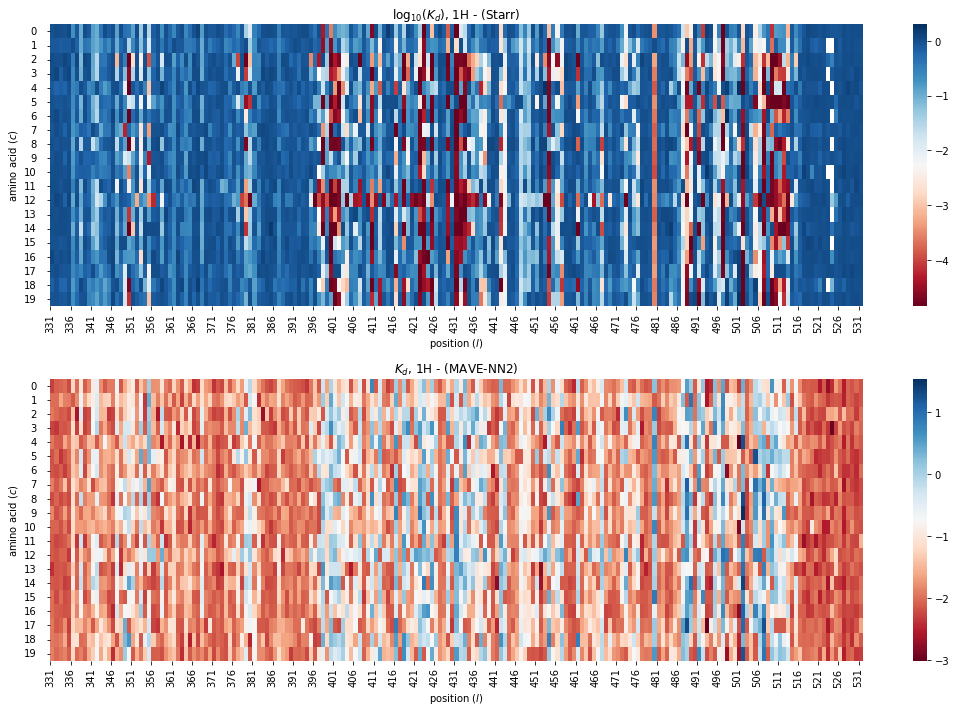

In [62]:
fig, axs = plt.subplots(2,1,figsize=(15,10))
from matplotlib.colors import LogNorm

from matplotlib import colors
divnorm=colors.TwoSlopeNorm(vmin=-10**-9, vcenter=10**-6.5, vmax=10**-5)
#pcolormesh(your_data, cmap="coolwarm", norm=divnorm)

data = (bloom_bind_df.values.ravel())
log_norm = LogNorm(vmin=min(data), vmax=max(data))
ax = axs[0]
sns.heatmap((bloom_bind_df.values.T),
            ax=ax,
            cmap='RdBu',
            #norm=log_norm
            #norm=divnorm
            #norm=norm
           )

ax.set_xticks(np.arange(0,201,5))
ax.set_xticklabels([f'{x}' for x in range(331,531+1,5)])
ax.tick_params(axis='y', which='major', pad=10)
ax.set_xlabel('position ($l$)')
ax.set_ylabel('amino acid ($c$)')
ax.set_title(f'$\log_{{10}}(K_d)$, 1H - (Starr)')
#ax.set_yticklabels(Adams_ordering,rotation=0)



ax = axs[1]
data = np.log10(mavenn2_Kd.values.ravel())
log_norm = LogNorm(vmin=min(data), vmax=max(data))

sns.heatmap(np.log10(mavenn2_Kd.values.T)+7,
            ax=ax,
            cmap='RdBu',
            #norm=log_norm
            #norm=divnorm
            #norm=norm
           )

ax.set_xticks(np.arange(0,201,5))
ax.set_xticklabels([f'{x}' for x in range(331,531+1,5)])
ax.tick_params(axis='y', which='major', pad=10)
ax.set_xlabel('position ($l$)')
ax.set_ylabel('amino acid ($c$)')
ax.set_title(f'$K_d$, 1H - (MAVE-NN2)')
#ax.set_yticklabels(Adams_ordering,rotation=0)

fig.tight_layout()
# fig.savefig('pngs/Titeseq_MP/Adams_Kd_vs_Mavenn2_Kd_heatmaps.png',
#             facecolor='white', edgecolor='none',
#             dpi=200,bbox_inches='tight')


Text(0.5, 0, '$(K_d)$, MAVE-NN, ${{\\rm exp}_{10}(\\phi)}^{-1}$')

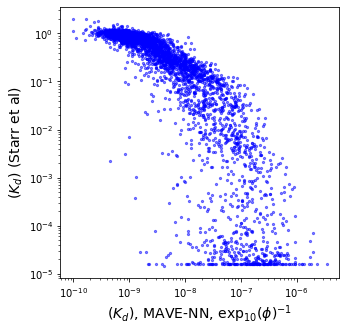

In [87]:
fig, ax = plt.subplots(figsize=(5,5))

ax.scatter(mavenn2_Kd.values.ravel(),10**bloom_bind_df.values.ravel()
            ,s=5,alpha=0.5,color='blue')
ax.set_xscale('log')
ax.set_yscale('log')
# ax.set_ylabel('$\log_{10}(K_d)$ (Starr et al)',fontsize=14)
# ax.set_xlabel('$\log_{10}(K_d)$, MAVE-NN, ${{\\rm exp}_{10}(\phi)}^{-1}$',fontsize=14)

ax.set_ylabel('$(K_d)$ (Starr et al)',fontsize=14)
ax.set_xlabel('$(K_d)$, MAVE-NN, ${{\\rm exp}_{10}(\phi)}^{-1}$',fontsize=14)

## Figure out what the following is

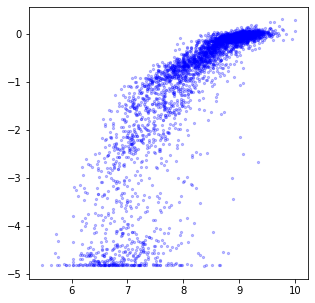

In [64]:
fig, ax = plt.subplots(figsize=(5,5))
ax.scatter(phi_single_mutants,bloom_bind_df.values.ravel(),s=5,color='blue',alpha=0.25)
#ax.set_xscale('log')
#ax.set_yscale('log')

Text(0.5, 0, '$(K_d)$, MAVE-NN, ${{\\rm exp}_{10}(\\phi)}^{-1}$')

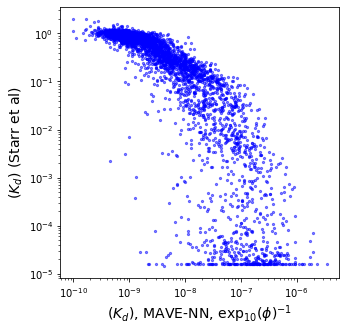

In [65]:
fig, ax = plt.subplots(figsize=(5,5))

ax.scatter(mavenn2_Kd.values.ravel(),10**bloom_bind_df.values.ravel()
            ,s=5,alpha=0.5,color='blue')
ax.set_xscale('log')
ax.set_yscale('log')
# ax.set_ylabel('$\log_{10}(K_d)$ (Starr et al)',fontsize=14)
# ax.set_xlabel('$\log_{10}(K_d)$, MAVE-NN, ${{\\rm exp}_{10}(\phi)}^{-1}$',fontsize=14)

ax.set_ylabel('$(K_d)$ (Starr et al)',fontsize=14)
ax.set_xlabel('$(K_d)$, MAVE-NN, ${{\\rm exp}_{10}(\phi)}^{-1}$',fontsize=14)

In [66]:
# fig, ax = plt.subplots(figsize=(5,5))


# # lims=[10**-12,10**-1]
# # ax.plot(lims,lims,'--',color='orange',lw=2)

# Rsq = np.corrcoef(1/(10**((phi_single_mutants))),
#             10**(bloom_bind_df.values.ravel()))[0,1]**2

# #ax.set_title(f'$R^2$ = {Rsq:.3f}')
# ax.scatter(np.log10(1/10**((phi_single_mutants))),
#            (bloom_bind_df.values.ravel()),
#             color='blue',s=5,alpha=0.25)
# #ax.set_xscale('log')
# #ax.set_yscale('log')

# ax.set_ylabel('$K_d$ (Starr et al)',fontsize=14)
# ax.set_xlabel('$K_d$, MAVE-NN, ${{\\rm exp}_{10}(\phi)}^{-1}$',fontsize=14)
# # ax.set_xlim(lims)
# # ax.set_ylim(lims)
# fig.tight_layout()
# # fig.savefig('pngs/__/__.png',
# #             facecolor='white', edgecolor='none',
# #             dpi=200,bbox_inches='tight')


In [67]:
#a = np.mean(as_list)

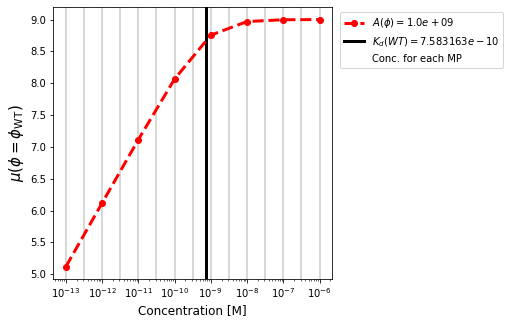

In [68]:
fig, ax = plt.subplots(figsize=(5,5))

phi_WT = gpmap.x_to_phi(WT_seq)
cs_ = np.arange(10**-13,10**-7,10**(-11))
cs_course = np.arange(10**-12,10**-1,10**(-7))
cs_fig_1  = np.array([10**(-13),10**(-12),10**(-11),10**(-10),10**(-9),10**(-8),10**(-7),10**(-6)])

#for a in as_list:
#ax.plot(cs_course,(mu_of_phi(c=cs_course,a=a,phi=phi_WT)),lw=3,zorder=10,label=f'$A(\phi) = {(10**a):.1e}$')    
ax.plot(cs_fig_1,(mu_of_phi(c=cs_fig_1,a=a,phi=phi_WT)),'ro--',lw=3,zorder=10,label=f'$A(\phi) = {(10**a):.1e}$')    

ax.set_xlabel('Concentration [M]',fontsize=12)
ax.set_ylabel('$\mu(\phi = \phi_{\\rm WT})$',fontsize=15)

Kd_WT = 1/(10**phi_WT)
ax.axvline(Kd_WT,color='black',lw=3,label=f'$K_d (WT) = {(Kd_WT):2e}$')
for c in cs:    
    ax.axvline(c,c='gray',zorder=-10,alpha=0.4)
    
ax.axvline(c,c='gray',label=f'Conc. for each MP',zorder=-10,alpha=0.0)    

leg = ax.legend(bbox_to_anchor=(1.01, 1), loc='upper left')
for lh in leg.legendHandles: 
    lh.set_alpha(1)


ax.set_xscale('log')
#ax.set_yscale('log')
#ax.set_xlim(10**-14,)    
#ax.set_yscale('log')
ax.legend(bbox_to_anchor=(1.01, 1), loc='upper left')

#fig.savefig(f'pngs/mu_phi_WT_vs_conc_{mu_pos}_{mu_neg}_{sigma_pos}.png',dpi=300,bbox_inches='tight')


In [69]:
N13F = 'NITNLCPFGEVFFATRFASVYAWNRKRISNCVADYSVLYNSASFSTFKCYGVSPTKLNDLCFTNVYADSFVIRGDEVRQIAPGQTGKIADYNYKLPDDFTGCVIAWNSNNLDSKVGGNYNYLYRLFRKSNLKPFERDISTEIYQAGSTPCNGVEGFNCYFPLQSYGFQPTNGVGYQPYRVVVLSFELLHAPATVCGPKKST'
phi_N13F = gpmap.x_to_phi(N13F)


In [70]:
S184H = model.x_consensus
S184H = list(S184H)
S184H[184-1] = 'H'
S184H = ''.join(S184H)
phi_S184H = gpmap.x_to_phi(S184H)

In [71]:
data_df

,x,TiteSeq_01_bin1,TiteSeq_01_bin2,TiteSeq_01_bin3,TiteSeq_01_bin4,TiteSeq_02_bin1,TiteSeq_02_bin2,TiteSeq_02_bin3,TiteSeq_02_bin4,TiteSeq_03_bin1,...,TiteSeq_14_bin3,TiteSeq_14_bin4,TiteSeq_15_bin1,TiteSeq_15_bin2,TiteSeq_15_bin3,TiteSeq_15_bin4,TiteSeq_16_bin1,TiteSeq_16_bin2,TiteSeq_16_bin3,TiteSeq_16_bin4
0,NITNLCPFGEVFNATRFASVYAWNRKRISNCVADYSVLYNSASFST...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,NITNLCPFGEVFSATRFASVYAWNRKRISNCVADYSVLYNSASFST...,0,0,0,0,0,0,0,0,1,...,0,0,21,0,0,0,17,0,0,0
2,NITNLCPFGEVFNATRFASVYCWNRKRISNCVADYSVLYNSASFST...,6,35,162,4,24,85,80,30,10,...,37,0,151,4,0,0,154,19,0,0
3,NITNLCPFGEVFFATRFASVYAWNRKRISNCVADYSVLYNSASFST...,0,1,3,439,1,0,14,307,17,...,82,0,180,12,0,12,306,20,0,0
4,NITNLKPFGEVFNAWRFASVYAWNRKRISNCVADYSVLYNSASFST...,0,0,3,0,0,0,0,0,4,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
184245,NITNLCPFGEVFNATRFASVYAWNRKRISNCVADYSVLYNSASFST...,0,0,0,239,0,0,1,167,0,...,0,0,246,5,0,0,183,26,0,0
184246,NITNLCPFGEVFNATRFASVYAWNRKRISNCVADYSVLYNSASFST...,0,29,211,45,0,44,244,19,1,...,1,1,147,10,0,0,210,30,0,0
184247,NITNLCPFGEVFNATRFASVYAWNRKRISNCVADYSVLYNSASFST...,0,24,394,13,0,28,389,2,0,...,0,0,388,27,0,0,366,40,0,0
184248,NITNLCPFGEVFNATRFASVYAWNRKRISNCVADYSVLYNSASFST...,49,17,1,0,19,4,0,5,41,...,0,0,88,19,0,0,119,5,0,0


In [72]:
WT_data_df = data_df[data_df['x']==model.x_consensus].reset_index(drop=True).copy()

In [73]:
WT_data_df

,x,TiteSeq_01_bin1,TiteSeq_01_bin2,TiteSeq_01_bin3,TiteSeq_01_bin4,TiteSeq_02_bin1,TiteSeq_02_bin2,TiteSeq_02_bin3,TiteSeq_02_bin4,TiteSeq_03_bin1,...,TiteSeq_14_bin3,TiteSeq_14_bin4,TiteSeq_15_bin1,TiteSeq_15_bin2,TiteSeq_15_bin3,TiteSeq_15_bin4,TiteSeq_16_bin1,TiteSeq_16_bin2,TiteSeq_16_bin3,TiteSeq_16_bin4
0,NITNLCPFGEVFNATRFASVYAWNRKRISNCVADYSVLYNSASFST...,0,0,0,0,0,0,0,14,0,...,0,1,0,0,0,0,0,0,0,0
1,NITNLCPFGEVFNATRFASVYAWNRKRISNCVADYSVLYNSASFST...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,NITNLCPFGEVFNATRFASVYAWNRKRISNCVADYSVLYNSASFST...,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,NITNLCPFGEVFNATRFASVYAWNRKRISNCVADYSVLYNSASFST...,3,3,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,NITNLCPFGEVFNATRFASVYAWNRKRISNCVADYSVLYNSASFST...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1596,NITNLCPFGEVFNATRFASVYAWNRKRISNCVADYSVLYNSASFST...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1597,NITNLCPFGEVFNATRFASVYAWNRKRISNCVADYSVLYNSASFST...,0,0,0,21,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1598,NITNLCPFGEVFNATRFASVYAWNRKRISNCVADYSVLYNSASFST...,0,0,0,18,0,0,5,22,0,...,0,0,4,0,0,0,4,7,0,0
1599,NITNLCPFGEVFNATRFASVYAWNRKRISNCVADYSVLYNSASFST...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [74]:
N13F_data_df = data_df[data_df['x']==N13F].reset_index(drop=True).copy()
S184H_data_df = data_df[data_df['x']==S184H].reset_index(drop=True).copy()

In [75]:
y_WT = WT_data_df[y_cols]
y_N13F = N13F_data_df[y_cols]
y_S184H = S184H_data_df[y_cols]

In [76]:
y_WT[y_cols]

,TiteSeq_01_bin1,TiteSeq_01_bin2,TiteSeq_01_bin3,TiteSeq_01_bin4,TiteSeq_02_bin1,TiteSeq_02_bin2,TiteSeq_02_bin3,TiteSeq_02_bin4,TiteSeq_03_bin1,TiteSeq_03_bin2,...,TiteSeq_14_bin3,TiteSeq_14_bin4,TiteSeq_15_bin1,TiteSeq_15_bin2,TiteSeq_15_bin3,TiteSeq_15_bin4,TiteSeq_16_bin1,TiteSeq_16_bin2,TiteSeq_16_bin3,TiteSeq_16_bin4
0,0,0,0,0,0,0,0,14,0,0,...,0,1,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,3,0,0,0,0,0,0,0,2,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1596,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1597,0,0,0,21,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1598,0,0,0,18,0,0,5,22,0,0,...,0,0,4,0,0,0,4,7,0,0
1599,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [77]:
mean_bin_list = []
for idx,conc_index in enumerate(np.arange(1,16+1,1)):
    
    # this is a concentration string to specific numbers of cells sorted in each 
    # of the 4 bins at a particular concentrations
    conc_string = f"{conc_index:02d}"
    
    df_conc = y_WT[[f'TiteSeq_{conc_string}_bin1',
    #df_conc = y[[f'TiteSeq_{conc_string}_bin1',
                 f'TiteSeq_{conc_string}_bin2',
                 f'TiteSeq_{conc_string}_bin3',
                 f'TiteSeq_{conc_string}_bin4']]
    
    # compute n across the 4 bins for a given concentration of ACE2
    n = df_conc.sum(axis=0)
    
    mean_bin = sum([i*n_i for i,n_i in enumerate(n,start=1)])/sum([n_i for n_i in n])
    
    if conc_index == 1:
        #print(mean_bin)
        A = 10**mean_bin
    elif conc_index == 16:
        #print(mean_bin) 
        B = 10**mean_bin
    
    #print(cs[idx],conc_index,mean_bin)
    mean_bin_list.append(mean_bin)

In [78]:
mean_bin_list_N13F = []
for idx,conc_index in enumerate(np.arange(1,16+1,1)):
    
    # this is a concentration string to specific numbers of cells sorted in each 
    # of the 4 bins at a particular concentrations
    conc_string = f"{conc_index:02d}"
    
    df_conc = y_N13F[[f'TiteSeq_{conc_string}_bin1',
    #df_conc = y[[f'TiteSeq_{conc_string}_bin1',
                 f'TiteSeq_{conc_string}_bin2',
                 f'TiteSeq_{conc_string}_bin3',
                 f'TiteSeq_{conc_string}_bin4']]
    
    # compute n across the 4 bins for a given concentration of ACE2
    n = df_conc.sum(axis=0)
    
    mean_bin_N13F = sum([i*n_i for i,n_i in enumerate(n,start=1)])/sum([n_i for n_i in n])
    
    if conc_index == 1:
        #print(mean_bin)
        A_N13F = 10**mean_bin_N13F
    elif conc_index == 16:
        #print(mean_bin) 
        B_N13F = 10**mean_bin_N13F
    
    #print(cs[idx],conc_index,mean_bin)
    mean_bin_list_N13F.append(mean_bin_N13F)

In [79]:
mean_bin_list_S184H = []
for idx,conc_index in enumerate(np.arange(1,16+1,1)):
    
    # this is a concentration string to specific numbers of cells sorted in each 
    # of the 4 bins at a particular concentrations
    conc_string = f"{conc_index:02d}"
    
    df_conc = y_S184H[[f'TiteSeq_{conc_string}_bin1',
    #df_conc = y[[f'TiteSeq_{conc_string}_bin1',
                 f'TiteSeq_{conc_string}_bin2',
                 f'TiteSeq_{conc_string}_bin3',
                 f'TiteSeq_{conc_string}_bin4']]
    
    # compute n across the 4 bins for a given concentration of ACE2
    n = df_conc.sum(axis=0)
    
    mean_bin_S184H = sum([i*n_i for i,n_i in enumerate(n,start=1)])/sum([n_i for n_i in n])
    
    if conc_index == 1:
        #print(mean_bin)
        A_S184H = 10**mean_bin_S184H
    elif conc_index == 16:
        #print(mean_bin) 
        B_S184H = 10**mean_bin_S184H
    
    #print(cs[idx],conc_index,mean_bin)
    mean_bin_list_S184H.append(mean_bin_S184H)

Text(0, 0.5, '$\\overline{bin_{ACE2}}$')

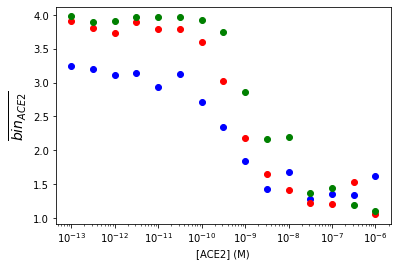

In [80]:
#mean_bin_list
plt.plot(cs, mean_bin_list,'bo')
plt.plot(cs, mean_bin_list_N13F,'ro')
plt.plot(cs, mean_bin_list_S184H,'go')
plt.xscale('log')
plt.xlabel('[ACE2] (M)')
plt.ylabel('$\overline{bin_{ACE2}}$',fontsize=14)

In [88]:
def mean_bin_mavenn2(c, 
                     A,
                     B,
                     phi=phi):

    K_a_of_phi = 10**(phi)
    
    #mu_of_phi = np.log10((10**3.27544038433542)*(c*K_a_of_phi)/(1+c*K_a_of_phi)+(10**1.6172296182198262))
    mu_of_phi = np.log10(A*(c*K_a_of_phi)/(1+c*K_a_of_phi)+B)
    
    return mu_of_phi

In [89]:
A,a,10**a,phi_WT

(1885.560120621889, 9, 1000000000, 9.120149612426758)

In [96]:
10**a,phi_WT,A,B

(1000000000, 9.120149612426758, 1885.560120621889, 41.421862073563226)

In [91]:
Starr_Fig1C_panel_df = pd.read_csv('Starr_Figure_1C_panel_1_data.csv',names=['[ACE2]','rel_ACE_binding'])
Starr_Fig1C_panel_df.columns

Index(['[ACE2]', 'rel_ACE_binding'], dtype='object')

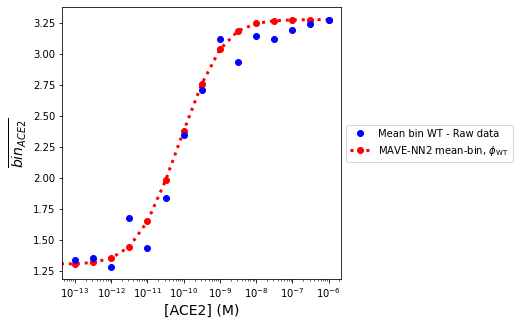

In [97]:
fig, ax = plt.subplots(1,1,figsize=(5,5))


ax.plot(np.array(cs)[::-1],mean_bin_list,'o',color='blue',label='Mean bin WT - Raw data',zorder=10)

# ax.plot(Starr_Fig1C_panel_df['[ACE2]'],Starr_Fig1C_panel_df['rel_ACE_binding'],'x',ms=7,color='black',label='Fig-1C (Sars-Cov-2), Starr et al')
ax.plot(np.array(cs)[::-1],(mean_bin_mavenn2(c=np.array(cs)[::-1],A=A,B=B,phi=phi_WT)),
        'ro:',lw=3,label='MAVE-NN2 mean-bin, $\phi_{\\rm WT}$')

#ax.axvline(3.9*10**(-11))
#ax.axvline(Kd_WT,color='black',lw=3,label=f'$K_d (WT) = {(Kd_WT):2e}$')
ax.set_xlabel('[ACE2] (M)',fontsize=14)
ax.set_ylabel('$\overline{bin_{ACE2}}$',fontsize=14)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
ax.set_xscale('log')
#fig.tight_layout()
#fig.savefig('Titeseq_sanity_check.png',dpi=200,bbox_inches='tight',facecolor='white', edgecolor='none')


## Make above for a bunch of variants - with a range of k_d values

In [98]:
bloom_binding_Kds_df = pd.read_csv('binding_Kds.txt')

In [99]:
data_df['x'].values[3][13-1]


'F'

In [100]:
temp_df = bloom_binding_Kds_df[(bloom_binding_Kds_df['variant_class']=='wildtype') & (bloom_binding_Kds_df['target']=='SARS-CoV-2')].reset_index(drop=True).copy()


In [101]:
temp_df

,library,target,barcode,variant_call_support,avgcount,log10Ka,delta_log10Ka,log10SE,response,baseline,nMSR,variant_class,aa_substitutions,n_aa_substitutions
0,lib1,SARS-CoV-2,AAAAAAAAGGACGGAA,9,177.75,10.72,-0.04,0.05,2.89,1.08,0.00,wildtype,NaN,0
1,lib1,SARS-CoV-2,AAAAAAATAATATACC,9,76.16,10.76,-0.01,0.05,2.94,1.03,0.00,wildtype,NaN,0
2,lib1,SARS-CoV-2,AAAAAACAACAATATC,2,22.25,10.83,0.07,0.07,2.94,1.02,0.00,wildtype,NaN,0
3,lib1,SARS-CoV-2,AAAAAACATCTGCATG,24,465.25,10.78,0.02,0.06,2.90,1.06,0.00,wildtype,NaN,0
4,lib1,SARS-CoV-2,AAAAAACGGTTGCATA,4,24.64,10.92,0.16,0.23,2.62,1.00,0.02,wildtype,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9119,lib2,SARS-CoV-2,TTTTTCACCTTGTAAC,4,30.53,10.85,0.02,0.05,2.90,1.13,0.00,wildtype,NaN,0
9120,lib2,SARS-CoV-2,TTTTTCCATGATCCTA,2,3.20,NaN,NaN,NaN,NaN,NaN,NaN,wildtype,NaN,0
9121,lib2,SARS-CoV-2,TTTTTTGGAAATGACA,5,62.74,10.82,-0.02,0.05,2.96,1.07,0.00,wildtype,NaN,0
9122,lib2,SARS-CoV-2,TTTTTTGGACGCTATA,8,143.06,10.86,0.02,0.06,2.92,1.04,0.00,wildtype,NaN,0


In [102]:
bloom_binding_Kds_df[bloom_binding_Kds_df['n_aa_substitutions']==1]

,library,target,barcode,variant_call_support,avgcount,log10Ka,delta_log10Ka,log10SE,response,baseline,nMSR,variant_class,aa_substitutions,n_aa_substitutions
3,lib1,SARS-CoV-2,AAAAAAAACAAGCAGA,6,146.32,10.35,-0.42,0.05,2.87,1.01,0.0,1 nonsynonymous,N13F,1
7,lib1,SARS-CoV-2,AAAAAAAACCCATCGT,3,1.78,NaN,NaN,NaN,NaN,NaN,NaN,1 nonsynonymous,S184H,1
9,lib1,SARS-CoV-2,AAAAAAAACGACAATA,1,2.09,NaN,NaN,NaN,NaN,NaN,NaN,1 nonsynonymous,G196Y,1
16,lib1,SARS-CoV-2,AAAAAAAAGTTATGTT,4,67.11,10.67,-0.09,0.09,2.89,1.06,0.0,1 nonsynonymous,P7S,1
29,lib1,SARS-CoV-2,AAAAAAACCTTACAAA,3,139.62,10.72,-0.05,0.05,2.90,1.03,0.0,1 nonsynonymous,P149Q,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195052,lib2,SARS-CoV-2,TTTTTTAATGACTTAG,8,88.30,10.63,-0.20,0.05,2.95,1.06,0.0,1 nonsynonymous,G116V,1
195055,lib2,SARS-CoV-2,TTTTTTAGACTATATG,2,124.00,10.32,-0.51,0.03,2.88,1.09,0.0,1 nonsynonymous,A67T,1
195060,lib2,SARS-CoV-2,TTTTTTATCCAAATCG,7,63.01,10.61,-0.22,0.07,2.89,1.11,0.0,1 nonsynonymous,N30R,1
195072,lib2,SARS-CoV-2,TTTTTTGCTGGCATAT,1,10.37,10.60,-0.23,0.10,2.98,1.00,0.0,1 nonsynonymous,Y91M,1


In [103]:
a_Bloom_N13F = np.mean(bloom_binding_Kds_df[bloom_binding_Kds_df['aa_substitutions']=='N13F']['response'])
b_Bloom_N13F = np.mean(bloom_binding_Kds_df[bloom_binding_Kds_df['aa_substitutions']=='N13F']['baseline'])
Kd_Bloom_N13F = 1/10**np.mean(bloom_binding_Kds_df[bloom_binding_Kds_df['aa_substitutions']=='N13F']['log10Ka'])

In [104]:
a_Bloom_S184H = np.mean(bloom_binding_Kds_df[bloom_binding_Kds_df['aa_substitutions']=='S184H']['response'])
b_Bloom_S184H = np.mean(bloom_binding_Kds_df[bloom_binding_Kds_df['aa_substitutions']=='S184H']['baseline'])
Kd_Bloom_S184H = 1/10**np.mean(bloom_binding_Kds_df[bloom_binding_Kds_df['aa_substitutions']=='S184H']['log10Ka'])

In [105]:
Kd_Bloom_N13F,a_Bloom_N13F,b_Bloom_N13F

(4.3834714451875436e-11, 2.833636363636364, 1.0609090909090912)

In [106]:
1/10**phi_N13F

2.184008776559353e-09

In [107]:
bloom_binding_Kds_df_WT = bloom_binding_Kds_df[bloom_binding_Kds_df['variant_class']=='wildtype'].copy()
bloom_binding_Kds_df_WT.head()

,library,target,barcode,variant_call_support,avgcount,log10Ka,delta_log10Ka,log10SE,response,baseline,nMSR,variant_class,aa_substitutions,n_aa_substitutions
13,lib1,SARS-CoV-2,AAAAAAAAGGACGGAA,9,177.75,10.72,-0.04,0.05,2.89,1.08,0.00,wildtype,NaN,0
57,lib1,SARS-CoV-2,AAAAAAATAATATACC,9,76.16,10.76,-0.01,0.05,2.94,1.03,0.00,wildtype,NaN,0
78,lib1,SARS-CoV-2,AAAAAACAACAATATC,2,22.25,10.83,0.07,0.07,2.94,1.02,0.00,wildtype,NaN,0
89,lib1,SARS-CoV-2,AAAAAACATCTGCATG,24,465.25,10.78,0.02,0.06,2.90,1.06,0.00,wildtype,NaN,0
109,lib1,SARS-CoV-2,AAAAAACGGTTGCATA,4,24.64,10.92,0.16,0.23,2.62,1.00,0.02,wildtype,NaN,0


In [108]:
bloom_binding_Kds_df_WT = bloom_binding_Kds_df_WT[['response','baseline','log10Ka']].reset_index(drop=True).dropna()


In [109]:
a_Bloom_mean = np.mean(bloom_binding_Kds_df_WT['response'])
b_Bloom_mean = np.mean(bloom_binding_Kds_df_WT['baseline'])
Kd_Bloom_mean = 1/10**np.mean(bloom_binding_Kds_df_WT['log10Ka'])

In [110]:
bloom_binding_Kds_df_WT_ss = bloom_binding_Kds_df_WT.sample(frac=0.1)

In [111]:
bloom_binding_Kds_df_WT_ss

,response,baseline,log10Ka
1003,3.00,1.00,10.73
7983,2.48,1.22,10.81
4268,2.89,1.04,10.87
589,2.89,1.08,10.67
1406,2.91,1.04,10.84
...,...,...,...
8082,2.82,1.21,10.69
7965,2.96,1.05,10.85
8083,2.96,1.06,10.81
2853,2.91,1.05,10.79


In [112]:
response = bloom_binding_Kds_df_WT_ss['response']
baseline = bloom_binding_Kds_df_WT_ss['baseline']
log10Ka = bloom_binding_Kds_df_WT_ss['log10Ka']

In [113]:
a_Bloom = np.mean(response)
b_Bloom = np.mean(baseline)
kD_WT_Bloom = np.mean(1/10**log10Ka)

In [114]:
a_Bloom,b_Bloom,kD_WT_Bloom

(2.907424593967517, 1.0717169373549884, 1.6701739916794565e-11)

In [115]:
def mean_bin_Bloom(cs, a_Bloom, b_Bloom, kD_WT_Bloom):
    return (a_Bloom * cs)/(cs+kD_WT_Bloom) +b_Bloom

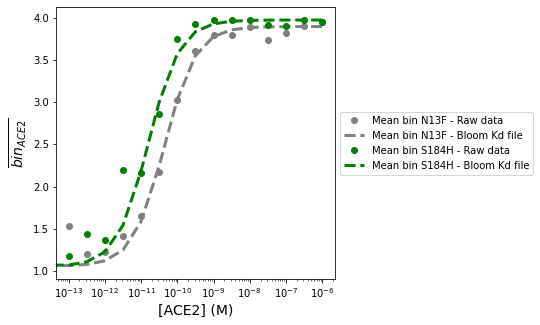

In [116]:
fig, ax = plt.subplots(1,1,figsize=(5,5))


ax.plot(np.array(cs)[::-1],mean_bin_list_N13F,'o',color='gray',label='Mean bin N13F - Raw data')
ax.plot(np.array(cs)[::-1],mean_bin_Bloom(np.array(cs)[::-1],a_Bloom_N13F, b_Bloom_N13F, Kd_Bloom_N13F),'--',lw=3,color='gray',label='Mean bin N13F - Bloom Kd file')


ax.plot(np.array(cs)[::-1],mean_bin_list_S184H,'o',color='green',label='Mean bin S184H - Raw data')
ax.plot(np.array(cs)[::-1],mean_bin_Bloom(np.array(cs)[::-1],a_Bloom_S184H, b_Bloom_S184H, Kd_Bloom_S184H),'--',lw=3,color='green',label='Mean bin S184H - Bloom Kd file')

# ax.plot(np.array(cs)[::-1],(mean_bin_mavenn2(c=np.array(cs)[::-1],phi=phi_WT)),
#         'ro-',lw=3,label='MAVE-NN2 mean-bin, $\phi_{\\rm WT}$')

# ax.plot(np.array(cs)[::-1],(mean_bin_mavenn2(c=np.array(cs)[::-1],phi=phi_N13F)),
#         'ro--',lw=3,label='MAVE-NN2 mean-bin, $\phi_{\\rm N13F}$')




#ax.axvline(3.9*10**(-11))
#ax.axvline(Kd_WT,color='black',lw=3,label=f'$K_d (WT) = {(Kd_WT):2e}$')
ax.set_xlabel('[ACE2] (M)',fontsize=14)
ax.set_ylabel('$\overline{bin_{ACE2}}$',fontsize=14)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
ax.set_xscale('log')
#fig.tight_layout()
#fig.savefig('Titeseq_sanity_check.png',dpi=200,bbox_inches='tight',facecolor='white', edgecolor='none')


In [135]:
A_N13F,A_S184H,10**mu_pos

(8985.745613405184, 8870.1962253467, 100000000000)

In [133]:
B,A,A_N13F

(41.421862073563226, 1885.560120621889, 8985.745613405184)

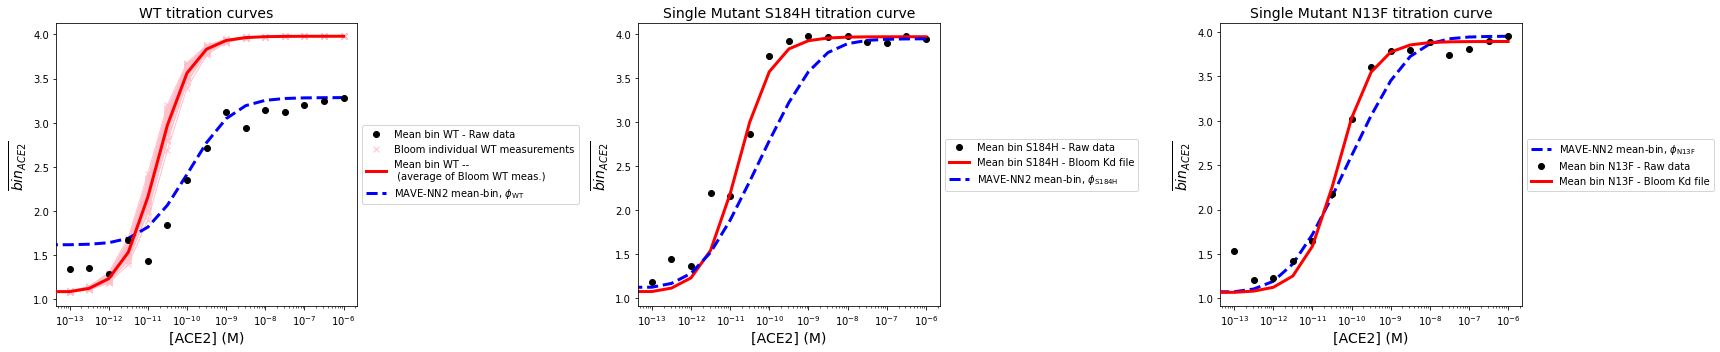

In [139]:
fig, axs = plt.subplots(1,3,figsize=(24,5))


ax = axs[0]
ax.plot(np.array(cs)[::-1],mean_bin_list,'o',color='black',label='Mean bin WT - Raw data',zorder=20)

counter = 0
for a_bloom, b_bloom, kD_WT_Bloom in zip(response, baseline, 1/10**log10Ka):
    #ax.plot(np.array(cs)[::-1],mean_bin_Bloom(np.array(cs)[::-1],a_Bloom, b_Bloom, kD_WT_Bloom),'x-',color='brown',label='Mean bin WT - Bloom Kd file',zorder=10)
    ax.plot(np.array(cs)[::-1],mean_bin_Bloom(np.array(cs)[::-1],a_Bloom, b_Bloom, kD_WT_Bloom),'x-',color='pink',alpha=1,lw=1)
    counter +=1
    if counter == 50:
        ax.plot(np.array(cs)[::-1],mean_bin_Bloom(np.array(cs)[::-1],a_Bloom, b_Bloom, kD_WT_Bloom),'x',color='pink',alpha=1,lw=1,label='Bloom individual WT measurements')
        break

ax.plot(np.array(cs)[::-1],mean_bin_Bloom(np.array(cs)[::-1],np.mean(response), np.mean(baseline), np.mean(1/10**log10Ka)),'-',lw=3,color='red',label='Mean bin WT -- \n (average of Bloom WT meas.)',zorder=20)
#ax.plot(Starr_Fig1C_panel_df['[ACE2]'],Starr_Fig1C_panel_df['rel_ACE_binding'],'x-',ms=7,color='black',label='Fig-1C, recreated from Starr et al')
ax.plot(np.array(cs)[::-1],(mean_bin_mavenn2(c=np.array(cs)[::-1],A=A,B=B,phi=phi_WT)),
        '--',color='blue',lw=3,label='MAVE-NN2 mean-bin, $\phi_{\\rm WT}$')



ax.set_xlabel('[ACE2] (M)',fontsize=14)
ax.set_ylabel('$\overline{bin_{ACE2}}$',fontsize=14)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
ax.set_xscale('log')        
ax.set_title('WT titration curves',fontsize=14)

ax = axs[1]
ax.set_title('Single Mutant S184H titration curve',fontsize=14)

ax.plot(np.array(cs)[::-1],mean_bin_list_S184H,'o',color='black',label='Mean bin S184H - Raw data')
ax.plot(np.array(cs)[::-1],mean_bin_Bloom(np.array(cs)[::-1],a_Bloom_S184H, b_Bloom_S184H, Kd_Bloom_S184H),'-',lw=3,color='red',label='Mean bin S184H - Bloom Kd file')

ax.plot(np.array(cs)[::-1],(mean_bin_mavenn2(c=np.array(cs)[::-1],A=A_S184H,B=B_S184H,phi=phi_S184H)),
#ax.plot(np.array(cs)[::-1],(mean_bin_mavenn2(c=np.array(cs)[::-1],A=A,B=B,phi=phi_S184H)),
        '--',color='blue',lw=3,label='MAVE-NN2 mean-bin, $\phi_{\\rm S184H}$')


ax.set_xlabel('[ACE2] (M)',fontsize=14)
ax.set_ylabel('$\overline{bin_{ACE2}}$',fontsize=14)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
ax.set_xscale('log')

ax = axs[2]
ax.plot(np.array(cs)[::-1],(mean_bin_mavenn2(c=np.array(cs)[::-1],A=A_N13F,B=B_N13F,phi=phi_N13F)),
        '--',color='blue',lw=3,label='MAVE-NN2 mean-bin, $\phi_{\\rm N13F}$')

ax.plot(np.array(cs)[::-1],mean_bin_list_N13F,'o',color='black',label='Mean bin N13F - Raw data')
ax.plot(np.array(cs)[::-1],mean_bin_Bloom(np.array(cs)[::-1],a_Bloom_N13F, b_Bloom_N13F, Kd_Bloom_N13F),'-',lw=3,color='red',label='Mean bin N13F - Bloom Kd file',zorder=20)


ax.set_title('Single Mutant N13F titration curve',fontsize=14)
#ax.axvline(3.9*10**(-11))
#ax.axvline(Kd_WT,color='black',lw=3,label=f'$K_d (WT) = {(Kd_WT):2e}$')
ax.set_xlabel('[ACE2] (M)',fontsize=14)
ax.set_ylabel('$\overline{bin_{ACE2}}$',fontsize=14)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
ax.set_xscale('log')
fig.tight_layout()
#fig.savefig(f'{path_to_packet}/Titeseq_sanity_check.png',dpi=300,bbox_inches='tight',facecolor='white', edgecolor='none')


In [120]:
f'Titeseq_sanity_check_{a}'

'Titeseq_sanity_check_9'

In [121]:
# fig, ax = plt.subplots(1,1,figsize=(5,5))


# ax.plot(np.array(cs)[::-1],mean_bin_list,'o',color='blue',label='Mean bin WT - Raw data',zorder=10)

# #for a_bloom, b_bloom, kD_WT_Bloom response
# ax.plot(np.array(cs)[::-1],mean_bin_Bloom(np.array(cs)[::-1]),'x-',color='brown',label='Mean bin WT - Bloom Kd file',zorder=10)

# ax.plot(Starr_Fig1C_panel_df['[ACE2]'],Starr_Fig1C_panel_df['rel_ACE_binding'],'x-',ms=7,color='black',label='Fig-1C, recreated from Starr et al')
# ax.plot(np.array(cs)[::-1],(mean_bin_mavenn2(c=np.array(cs)[::-1],phi=phi_WT)),
#         'ro-',lw=3,label='MAVE-NN2 mean-bin, $\phi_{\\rm WT}$')

# #ax.axvline(3.9*10**(-11))
# #ax.axvline(Kd_WT,color='black',lw=3,label=f'$K_d (WT) = {(Kd_WT):2e}$')
# ax.set_xlabel('[ACE2] (M)',fontsize=14)
# ax.set_ylabel('$\overline{bin_{ACE2}}$',fontsize=14)
# ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
# ax.set_xscale('log')
# #fig.tight_layout()
# fig.savefig('Titeseq_sanity_check.png',dpi=200,bbox_inches='tight',facecolor='white', edgecolor='none')


In [122]:
A

1885.560120621889

In [123]:
10**bloom_bind_df

,A,C,D,E,F,G,H,I,K,L,M,N,P,Q,R,S,T,V,W,Y
0,0.933254,0.812831,1.071519,1.000000,0.794328,0.912011,0.954993,0.851138,0.977237,0.891251,0.954993,1.000000,0.933254,1.023293,0.954993,0.933254,1.148154,0.912011,0.691831,0.870964
1,1.000000,0.812831,0.954993,1.202264,0.602560,0.831764,1.096478,1.000000,0.891251,1.000000,1.000000,1.000000,1.148154,0.954993,1.000000,0.912011,0.933254,1.000000,0.933254,0.933254
2,0.977237,0.724436,0.977237,0.707946,0.707946,0.851138,0.851138,0.870964,0.977237,0.977237,0.954993,0.870964,1.071519,1.047129,1.000000,0.831764,1.000000,0.891251,0.616595,0.851138
3,0.933254,0.776247,1.174898,1.023293,0.602560,0.933254,0.954993,0.630957,0.933254,0.630957,0.891251,1.000000,0.660693,1.023293,1.000000,0.870964,0.912011,0.851138,0.575440,0.812831
4,1.096478,0.776247,1.000000,1.148154,0.933254,0.831764,0.933254,0.954993,0.933254,1.000000,1.023293,1.071519,1.148154,0.954993,0.977237,1.023293,1.047129,0.831764,0.891251,0.954993
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,1.047129,1.000000,1.023293,1.047129,1.047129,1.047129,0.977237,1.023293,1.122018,1.096478,1.288250,1.023293,1.000000,1.174898,1.071519,1.071519,1.047129,1.096478,0.630957,1.071519
197,0.954993,0.977237,1.000000,0.954993,1.288250,1.000000,0.977237,0.870964,1.000000,1.000000,1.023293,1.047129,0.691831,1.000000,0.977237,0.977237,0.954993,1.023293,0.954993,0.870964
198,1.000000,1.023293,1.071519,0.870964,1.071519,1.071519,0.954993,1.023293,1.000000,0.977237,1.071519,0.831764,1.023293,1.047129,0.794328,1.023293,0.912011,1.174898,1.000000,1.000000
199,1.000000,0.977237,0.977237,1.122018,1.096478,0.870964,1.000000,1.047129,0.954993,1.047129,1.122018,1.202264,1.047129,0.912011,0.891251,1.000000,0.977237,1.023293,0.977237,1.047129


In [124]:
np.sum(bloom_bind_df.fillna(0).values*(_x_to_mat(x_test.values[0],np.array(model.alphabet))))

-5.279999999999999

In [125]:
bloom_bind_df.shape

(201, 20)

In [126]:
N13F in x_train.values

True

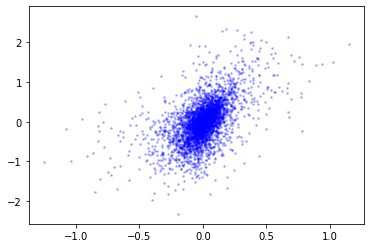

In [127]:
plt.scatter(np.load('sortseq_gpmap_monotonic_agnostic.npy').ravel(),
            gpmap.get_theta(model,gauge='uniform')['theta_lc'].ravel(),s=2.5,alpha=0.25,color='blue')

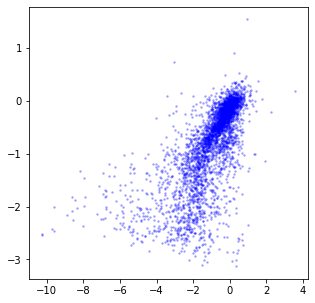

In [128]:
fig, ax = plt.subplots(1,1,figsize=(5,5))
ax.scatter(np.load('sortseq_gpmap_monotonic_agnostic_consensus.npy').ravel(),
           2*theta_lc_consensus_dm_df.values.ravel(),
           s=2.5,alpha=0.25,color='blue')
# ax.set_xlim(-4,1)
# ax.set_ylim(-4,1)